In [251]:
! pip install emoji

In [252]:
import numpy as np
import pandas as pd
import missingno as ms
import seaborn as sns
import plotly.express as px
import re
import string
import emoji
import matplotlib.pyplot as plt
from importlib import reload
import folium
from sklearn.datasets import load_iris
from scipy import stats
from scipy.stats import normaltest, shapiro, chi2_contingency, mannwhitneyu, ttest_ind, kruskal, f_oneway
import time

import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from statsmodels.stats.proportion import proportions_ztest
import folium

# **Data Understanding untuk memahami tabel data pada AirBNB Bangkok**

Dataset ini berisi data transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B).

- ***Setiap `baris` mewakili sebuah `transaksi` dalam sekali reservasi.***

| No. | Fitur | Deskripsi | Detail |
|-|-|-|-|
| 1. | **ID** | Identifikasi unik AirBNB untuk setiap listing. | |
| 2. | **Name** | Nama Daftar. |
| 3. | **host_id** | ID Unik airBNB untuk setiap host/user. |
| 4. | **host_name** | nama Host/Nama depan. |
| 5. | **Neighborhood** | kode geografis lingkungan menggunakan garis lintang dan garis bujur terhadap lingkungan. |
| 6. | **Latitude** | Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk garis lintang.|
| 7. | **Longitude** |  Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk garis bujur. |
| 8. | **Room Type** | Tipe ruangan yang dimiliki oleh AirBNB Bangkok. | Entire Place adalah yang terbaik jika Anda mencari penginapan dengan fasilitas lengkap. Dengan seluruh tempat, Anda akan memiliki seluruh ruangan untuk  dirimu sendiri. Ini biasanya mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk khusus yang terpisah. Tuan rumah harusnya |
| | | | Private Room tepat untuk anada yang menginginkan privasi danmasih menginginkan memiliki koneksi local Saat Anda memesan kamar pribadi kamar, Anda akan memiliki kamar pribadi untuk tidur dan mungkin berbagi beberapa ruang dengan orang lain. Anda mungkin perlu berjalan kaki melalui ruang dalam ruangan yang mungkin ditempati oleh tuan rumah atau tamu lain untuk sampai ke kamarmu.|
| | | | Shared Room bagi anda yang tidak masalah untuk berbagi ruangan Saat Anda memesan kamar bersama, Anda akan tidur di ruang yang digunakan bersama dengan orang lain dan berbagi keseluruhan ruang dengan orang lain. Kamar bersama sangat populer di kalangan wisatawan fleksibel yang mencari teman baru dan penginapan ramah anggaran |
| 9. | **Price** | Harga harian dalam mata uang lokal. Catatan, tanda $ dapat digunakan meskipun lokal. |
| 10. | **minimum_nights** | Jumlah minimum masa inap malam untuk listing (kalender aturan mungkin berbeda). |
| 11. | **number_of_reviews** | Jumlah ulasan yang dimiliki dalam daftar. |
| 12. | **availability_365** | ketersediaan_x. Kalender menentukan ketersediaan daftar x hari di masa depan. Perhatikan bahwa daftar mungkin tersedia karena sudah dipesan oleh tamu atau diblokir oleh pihak tersebut tuan rumah. |
| 13. | **number_of_reviews_ltm** | Jumlah ulasan yang dimiliki listingan (dalam 12 bulan terakhir). |

In [253]:
%cd /content/drive/MyDrive/JCDS 0212/Module 2/AirBNB

[Errno 2] No such file or directory: '/content/drive/MyDrive/JCDS 0212/Module 2/AirBNB'
/content


In [254]:
import re

def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'
    url = re.sub(pattern, replacement, url)
    return url

In [255]:
# Replace with your modified URL
url = 'https://docs.google.com/spreadsheets/d/1VNHapqflJd0WDIbvHk4JRiOBNCAgPMXpfxdju6p_bu8/edit?usp=sharing'
url = convert_google_sheet_url(url)
print(url)

https://docs.google.com/spreadsheets/d/1VNHapqflJd0WDIbvHk4JRiOBNCAgPMXpfxdju6p_bu8/export?format=csv


In [256]:
url = 'https://docs.google.com/spreadsheets/d/1VNHapqflJd0WDIbvHk4JRiOBNCAgPMXpfxdju6p_bu8/export?format=csv'
df = pd.read_csv(url)

In [257]:
df = pd.read_csv(url)
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Tahap Data Cleaning dan Understanding

In [258]:
# Mengecek tipe data
df.dtypes

Unnamed: 0                          int64
id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [259]:
# Melihat ID Unik tiap kolom
# sample unique value dari setiap kolom
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

def unique_data(airbnb):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = airbnb.columns
    data_unique['Unique Count'] = [airbnb[col].nunique() for col in (airbnb.columns)]
    data_unique['Unique'] = [airbnb[col].unique()[:5] for col in (airbnb.columns)]
    return data_unique


unique_data(df)

,Columns,Unique Count,Unique
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4]"
1,id,15854,"[27934.0, 27979.0, 28745.0, 35780.0, 941865.0]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint]"
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315]"
4,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem]"
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen]"
6,latitude,9604,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872]"
7,longitude,10214,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338]"
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
9,price,3040,"[1905, 1316, 800, 1286, 1000]"


In [260]:
# Menganalisa data yang memiliki nilai nol
missing_result = {
    'count':df.isnull().sum(),
    'count (%)': round( (df.isnull().sum() / len(df)) * 100, 3 )
}

print("Jumlah nilai kosong pada setiap kolom")
df_missing = pd.DataFrame(missing_result)
df_missing[df_missing['count'] > 0].sort_values('count', ascending=False)

Jumlah nilai kosong pada setiap kolom


,count,count (%)
last_review,5790,36.521
reviews_per_month,5790,36.521
name,8,0.050
host_name,1,0.006


<Axes: >

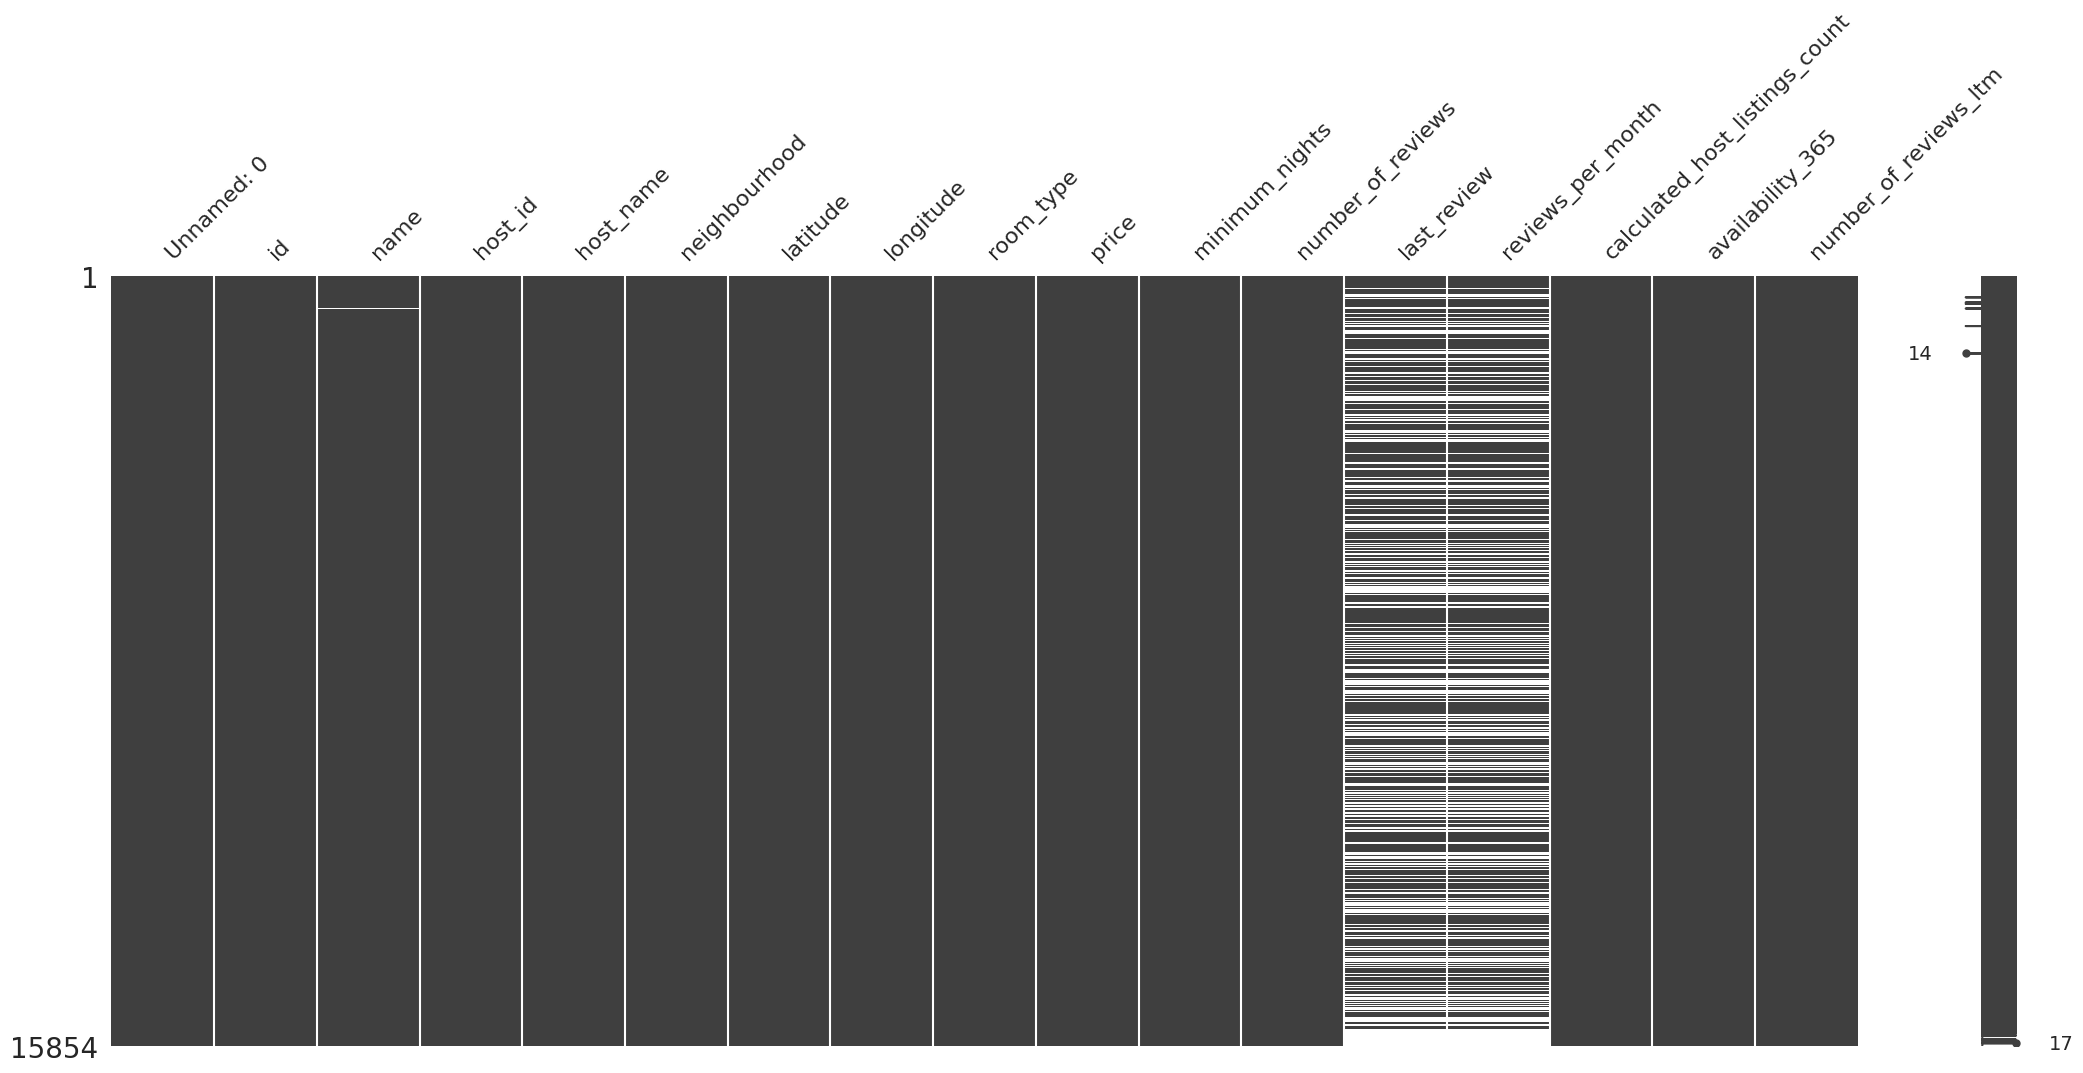

In [261]:
ms.matrix(df)

In [262]:
df[df['last_review'].str.contains('2017', na=False)].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5,5,1704776.0,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
97,97,432004.0,STUDIO-WIFI-RAIN SHOWER-SATHORN,2148220,Marvin,Sathon,13.71922,100.52550,Private room,1736,1,14,2017-02-23,0.12,3,356,0
154,154,1323380.0,Master Suite in Pool Villa,2975807,Ingo,Vadhana,13.74618,100.55168,Private room,9600,28,1,2017-06-19,0.01,2,365,0
158,158,2118606.0,City heart resort style condo.,10802851,Susie,Phaya Thai,13.78064,100.54393,Entire home/apt,1385,3,7,2017-07-26,0.07,1,348,0
159,159,2124717.0,Large cozy Studio in on nut 17,5469970,Yair,Suanluang,13.72340,100.61828,Entire home/apt,1212,10,10,2017-08-10,0.10,10,365,0


In [263]:
df[df['last_review'].str.contains('2019', na=False)].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9,9,952677.0,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,13.72040,100.50757,Private room,700,2,4,2019-12-27,0.03,10,87,0
10,10,55681.0,Sathorn Terrace Apartment(61),263049,Tor,Bang Rak,13.71934,100.51760,Private room,1150,2,27,2019-01-03,0.19,7,320,0
12,12,55686.0,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.51539,Hotel room,1862,2,208,2019-12-02,1.44,7,361,0
16,16,1791481.0,Nice and Quiet condo near BTS Onnut,9399478,Piyakorn,Khlong Toei,13.70719,100.59936,Entire home/apt,1577,30,78,2019-05-31,0.78,1,330,0
29,29,973830.0,BangLuang House1 @ Bangkok Thailand,5325919,วสวัตติ์,Bangkok Yai,13.73292,100.46413,Private room,2078,1,76,2019-12-31,0.64,3,350,0


In [264]:
df[df['last_review'].str.contains('2022', na=False)].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
11,11,1765918.0,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1
19,19,1793000.0,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2022-11-22,2.59,1,349,3
28,28,145343.0,Boutique Rooms Near Bangkok Airport,703944,Parinya,Lat Krabang,13.721868,100.771713,Private room,1329,1,28,2022-11-25,0.28,1,349,13
30,30,156583.0,Studio near Chula University/Silom walk to MRT/BTS,58920,Gael,Bang Rak,13.728500,100.523130,Entire home/apt,1176,7,63,2022-11-25,0.47,2,95,2


In [265]:
df[df['reviews_per_month']==0.5].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
853,853,5885757.0,"New Condo , Ideo Mobi, Bangkok",28135799,Kriengwut,Phra Khanong,13.705260,100.603180,Entire home/apt,2000,2,46,2020-01-27,0.5,1,271,0
1365,1365,9678113.0,♥Big room near BTS 5 min♥free Hi speed wifi♥,49626061,Chayut,Thon buri,13.715240,100.480310,Entire home/apt,2000,60,26,2019-09-18,0.5,1,89,0
1556,1556,9935839.0,Silom 3 apartment no. 1 (BTS Saladaeng station),26736483,K,Bang Rak,13.725770,100.532250,Entire home/apt,954,1,41,2022-12-23,0.5,89,0,12
1956,1956,13007341.0,New Near MRT 1BR Kitchen Pool Fitness Quiet&Safe,71749140,Anucha,Huai Khwang,13.772075,100.577812,Entire home/apt,935,30,40,2017-02-07,0.5,1,365,0


In [266]:
df['reviews_per_month'].max()

19.13

In [267]:
df[df['last_review'].str.contains('2023', na=False)]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [268]:
len(df[df['availability_365']==0])

857

## Insight :    
- data kosong antara lain pada kolom name , last_review , reviews_per_month. Data Kosong diwakili dengan kata NaN

- kolom number_of_reviews adalah total keseluruhan review dari mulai listing tersebut di daftarkan. Sedangkan number_of_reviews_ltm adalah total review hanya per tahun 2022

- Kolom availability_365 mewakilkan jumlah ketersediaan listing yang tersedia dalam waktu setahun. Ada sekitar 857 baris yang memiliki jumlah 0. Artinya di dalam data ini terdapat listing yang tidak dapat disewakan. Asumsinya bisa jadi host dari pihak properti memang sudah tidak menyewakan unit nya di Airbnb tetapi data nya masih ada.

## Handling Missing Values

In [269]:
# Hapus Kolom yang tidak diperlukan
df.drop('Unnamed: 0',axis=1,inplace=True)

In [270]:
# Mengubah data kolom last_review menjadi kolom tipe date tipe
df['last_review']= pd.to_datetime(df['last_review'])

In [271]:
# Ada satu host name yang memiliki jumlah listing sebanyak 3 tetapi satu tidak ada namanya. Mari kita analisa lebih lanjut
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326.0,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758.0,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,NaN,3,1,0
2075,13142743.0,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [272]:
# ubah baris dengan index 2075 dengan missing name menjadi 'Erraday Guest House'
df.at[2075, 'name'] = 'Errday Guest House'
df[df['host_name']=='Pakaphol']


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326.0,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758.0,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,NaN,3,1,0
2075,13142743.0,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [273]:
# Sisa data yang lainnya yaitu missing values pada name dan host name diganti dengan unknown

df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

## Insight :
- Dari hasil analisa diatas terlihat bahwa nama listing tidak ada tetapi kolom lain terisi bahkan sudah ada yang memberikan review. Tetapi ada banyak juga yang memang tidak ada reviewnya. Ini dapat dikatakan anomali karena nama dari listing adalah hal yang penting sebagai identitas dari sebuah listing. dan listing dapat dikatakan terpercaya jika ada nama dari listing. Asumsi nya adalah ini listing yang tidak terpercaya dan dapat menjadi resiko terjadinya fraud.

- `berdasarkan analisa data ini akan tetap dipertahankan dengan sisa data name dan host name yang kosong diisi dengan unknown`

- hal ini dapat terjadi karena adanya bug atau memang listing dapat dibuat tanpa mencantumkan nama listing. Dimana hal itu bisa menyebabkan terjadinya fraud

- Rekomendasi : Sebaiknya pihak dari AirBnb memperhatikan dan memperbaiki sistem ketika host mendaftarkan sebuah listing. Jadi listing tidak bisa dibuat ketika host tidak mencatumkan nama pada listing yang ingin dibuat.

## Sisa data yang kosong lainnya yaitu last_review dan review_per_month yang kosong :     
kolom last_review dengan nilai "Not Reviewed" dan kolom reviews_per_month dengan nilai 0 untuk mengisi missing value.

In [274]:
df['last_review'] = df['last_review'].fillna('Not Reviewed')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,Not Reviewed,0.0,2,358,0


Summary:
- Terdapat total **8 kolom name dan 1 kolom host_name** yang didalamnya memiliki nilai kosong
- Dari hasil observasi menunjukan bahwa kolom `last_review` dan `review_per_nonth` mempengaruhi satu sama lainnya. Kolom last_review dan review_per_month memiliki missing value yang sama. Dimana kolom last_review mewakili sebagai tanggal terakhir customer memberikan review di listing tersebut dan kolom review_per_month adalah rata - rata jumlah review yang diperoleh dalam waktu sebulan. Jadi jika keduanya kosong adalah tidak ada pengguna yang memberikan review terhadap listing tersebut. Jadi jika tidak ada pengguna yang memberikan review terhadap listing maka tidak ada tanggal terakhir yang diberikan.
- Sedangkan untuk kolom yang lainnya **tidak memiliki nilai nol sama sekali**

Action:
- Menghapus kolom `mengganti kolom name dan host name yang kosong dengan unknown` karena tidak memiliki nilai sama sekali
- Mengambil kelompok data yang baru / menghapus beberapa kolom yang tidak berhubungan dalam melakukan analisa

In [275]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Handling Data Duplikat

In [276]:
df.duplicated().sum()

0

In [277]:
duplicate = df[df.duplicated(subset=['name','longitude', 'latitude', 'price', 'last_review'])]
duplicate.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5976,2.890786e+07,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,Not Reviewed,0.0,9,361,0
8790,3.795413e+07,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
15121,7.671287e+17,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,Not Reviewed,0.0,13,339,0
15144,7.679459e+17,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,Not Reviewed,0.0,40,339,0
15186,7.656914e+17,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,44,340,0


In [278]:
# Mengecek data duplikate
df[df['name']=='small1']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6728,31678264.0,small1,97598307,Soo,Don Mueang,13.91507,100.58584,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
8789,37953702.0,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
8790,37954129.0,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,Not Reviewed,0.0,4,180,0


In [279]:
df[df['name']=='NA BANGLAMPOO GUEST HOUSE']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409.0,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,Not Reviewed,0.00,9,361,0
5892,28832370.0,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76162,100.49768,Private room,750,1,16,2020-02-18 00:00:00,0.32,9,360,0
5976,28907857.0,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,Not Reviewed,0.00,9,361,0


Dapat dilihat ternyata data tersebut adalah data duplikat karena ada 2 row yang sama persis. Maka penanganannya adalah kita dapat menghilangkan data duplicate tersebut

In [280]:
df.drop_duplicates(subset=['name', 'longitude', 'latitude', 'price', 'last_review'], inplace=True)

data duplikate lain :     

- data duplikate berdasarkan nama daerahnya dengan kolom 'name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood'
- data duplikate berdasarkan titik lokasi dengan kolom 'longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'.

Hal ini dilakukan karena besar kemungkinan atau dapat diduga bahwa properti yang terdaftar untuk disewakan adalah properti yang sama.

In [281]:
df_duplicate = df[df.duplicated(subset=['name', 'room_type', 'host_id', 'host_name', 'price', 'neighbourhood'], keep=False)]
display(len(df_duplicate))
df_duplicate.head(3)

739

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
288,1585084.0,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73616,100.57224,Entire home/apt,9999,2,46,2019-02-26 00:00:00,0.43,53,356,0
294,2682899.0,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73610,100.57040,Entire home/apt,9999,2,25,2022-12-07 00:00:00,0.24,53,358,2
317,3638924.0,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Kiattisak,Vadhana,13.73757,100.56994,Entire home/apt,9999,2,24,2022-12-22 00:00:00,0.24,53,359,2


In [282]:
# Berdasarkan titik lokasi (longitude & latitude)
df_duplicate = df[df.duplicated(subset=['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'], keep=False)]
display(len(df_duplicate))
df_duplicate.head(3)

76

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
486,4639962.0,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.73313,100.56259,Private room,4871,1,27,2022-07-11 00:00:00,0.28,12,364,1
1162,7717620.0,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.73313,100.56259,Private room,4871,1,20,2019-08-08 00:00:00,0.30,12,364,0
2119,13777582.0,"Studio with Zen garden view (30sqm), LUXX Silom",68154488,Dusadee,Bang Rak,13.72633,100.52531,Hotel room,1777,1,1,2017-03-18 00:00:00,0.01,62,271,0


In [283]:
df_duplicate.groupby(['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'])[['id']].count().head(3)

id
longitude latitude  name                                            room_type       host_id   host_name    
100.50360 13.788938 15days!New!Bang Phlat MRT 600m/swiming pool/gym Entire home/apt 52161947  Noons       2
                                                                                    201677068 Curry       2
100.50468 13.757000 Vintage LOFT SUITE in Bangkok old town          Hotel room      214236911 Jason       2

## Insight :     
Berdasarkan hasil pemeriksaan duplikasi data, dapat diduga bahwa terdapat 758 properti (berdasarkan daerah) dan 94 properti (berdasarkan titik lokasi) yang memiliki duplikat data terdaftar pada aplikasi.

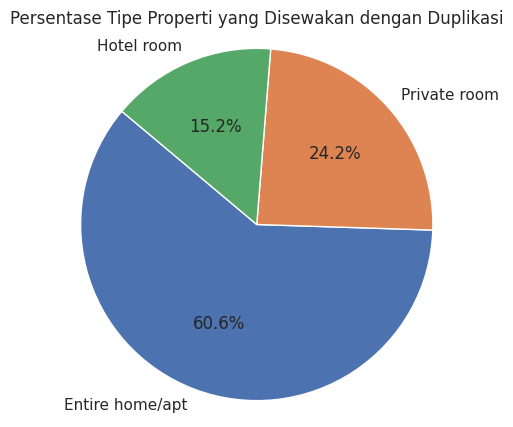

In [284]:
# Menghitung jumlah duplikat berdasarkan kolom yang disebutkan
df_duplicate_count = df_duplicate.groupby(['longitude', 'latitude', 'name', 'room_type', 'host_id', 'host_name'])[['id']].count().reset_index()

# Menghitung persentase untuk setiap room_type
room_type_percentage = df_duplicate_count['room_type'].value_counts(normalize=True) * 100

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(room_type_percentage, labels=room_type_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Tipe Properti yang Disewakan dengan Duplikasi')
plt.axis('equal')  # Mengatur aspek lingkaran menjadi persegi agar terlihat seperti lingkaran
plt.show()

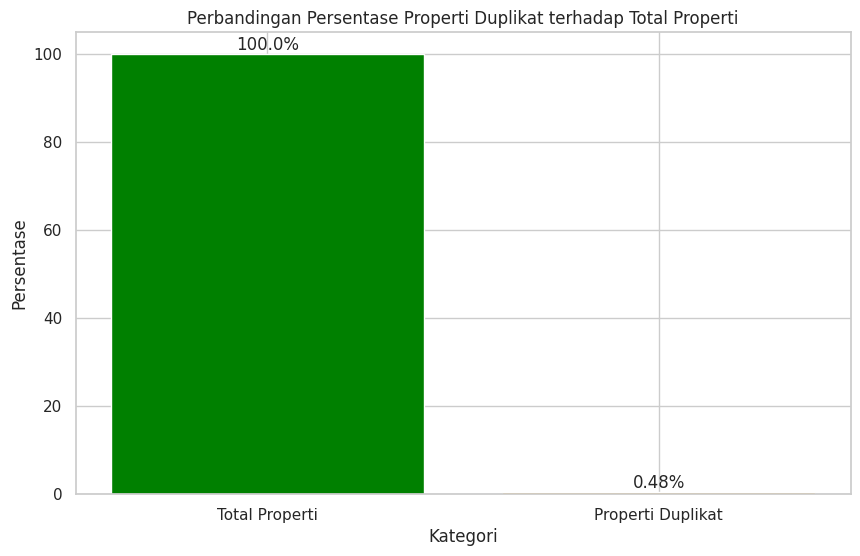

In [285]:
import matplotlib.pyplot as plt

# Menghitung total id
total_id = len(df['id'])

# Menghitung jumlah properti duplikat
total_duplicate = len(df_duplicate)

# Menghitung proporsi properti duplikat terhadap total properti
proporsi_duplicate = total_duplicate / total_id * 100

# Data untuk bar chart
data = [100, proporsi_duplicate]  # Menggunakan 100 untuk total properti dan proporsi_duplicate untuk properti duplikat

# Label untuk bar chart
labels = ['Total Properti','Properti Duplikat']

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, data, color=['green', 'orange'])

# Menambahkan label angka (persentase) pada setiap bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.xlabel('Kategori')
plt.ylabel('Persentase')
plt.title('Perbandingan Persentase Properti Duplikat terhadap Total Properti')
plt.show()

Permasalahan diatas memiliki kemungkinan bahwa lokasi berada pada gedung apartemen dan pemiliki properti memiliki lebih dari 1 apartemen yang ingin disweakan, tapi seharusnya pemilik membedakan nama properti untuk menghindari kebingungan dari calon penyewa. Hal ini dapat dihindari dengan membuat kolom pengisian nama properti (saat pemiliki properti ingin mendaftarkan propertinya untuk disewakan) tidak dapat diisi dengan nama yang sudah terdaftar (axis) sebulnya. Nama dapat dibuat seperti Username (unique name). Hal ini juga dapat membingungkan pengguna.

Permasalahan diatas juga dapat menyebabkan konflik pemesanan jika ternyata properti-properti yang terdaftar secara duplikat adalah 1 properti yang sama, artinya ketika seseorang sudah memesan properti tertentu, dan orang lain mencoba memesan properti yang sama, aplikasi menunjukkan bahwa ada 2 (padahal hanya 1) properti yang sama tersedia untuk disewakan. Akibatnya, orang kedua mungkin secara keliru percaya bahwa properti masih tersedia untuk disewakan ketika orang lain sudah memesannya.

## Handling Outlier and data Anomalies

In [286]:
# Melihat kolom avability_365 yang bernilai nol dan price juga bernilai nol
df.loc[(df['availability_365'] == 0 ) & (df['price'] == 0 )]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108.0,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,Not Reviewed,0.0,1,0,0


In [287]:
# drop kolom yang memiliki data kosong diatas
df.drop(11103, inplace=True)

In [288]:
# Melihat data deskripsi dari masing masing tabel
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.583900e+04,1.583900e+04,15839.000000,15839.000000,1.583900e+04,15839.000000,15839.000000,15839.000000,15839.000000,15839.000000,15839.000000
mean,1.575038e+17,1.540346e+08,13.745147,100.559920,3.218931e+03,15.305512,16.669929,0.516667,13.873287,244.312015,3.484816
std,2.942463e+17,1.318559e+08,0.043030,0.050925,2.498390e+04,50.837272,40.629323,0.953071,30.270824,125.850519,8.920515
min,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104507e+07,3.974431e+07,13.720120,100.529695,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.501654e+07,1.223632e+08,13.738490,100.561440,1.428000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.252050e+07,2.386268e+08,13.759520,100.585165,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15839,15839,15839,15839,15839
unique,14794,5312,50,4,1670
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,Not Reviewed
freq,45,228,2151,8901,5775


- Variabel harga memiliki 75% nilainya di bawah 1900, namun nilai maksimumnya adalah 312839.
- Jumlah minimum_malam melebihi 365 hari dalam setahun.

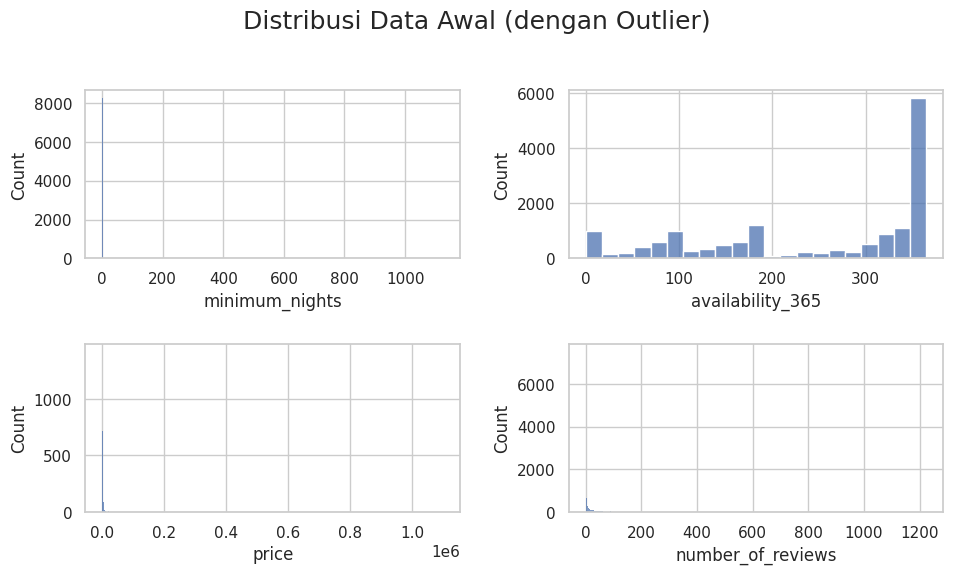

In [289]:
#Visualisasi data
plt.figure(figsize=(10,6)).suptitle("Distribusi Data Awal (dengan Outlier)", fontsize=18)

columns = ['minimum_nights', 'availability_365', 'price', 'number_of_reviews']
for i, columns in enumerate(columns, start=1):
    plt.subplot(2,2,i)
    sns.histplot(df[columns])

plt.tight_layout(pad=2.0)
plt.show()

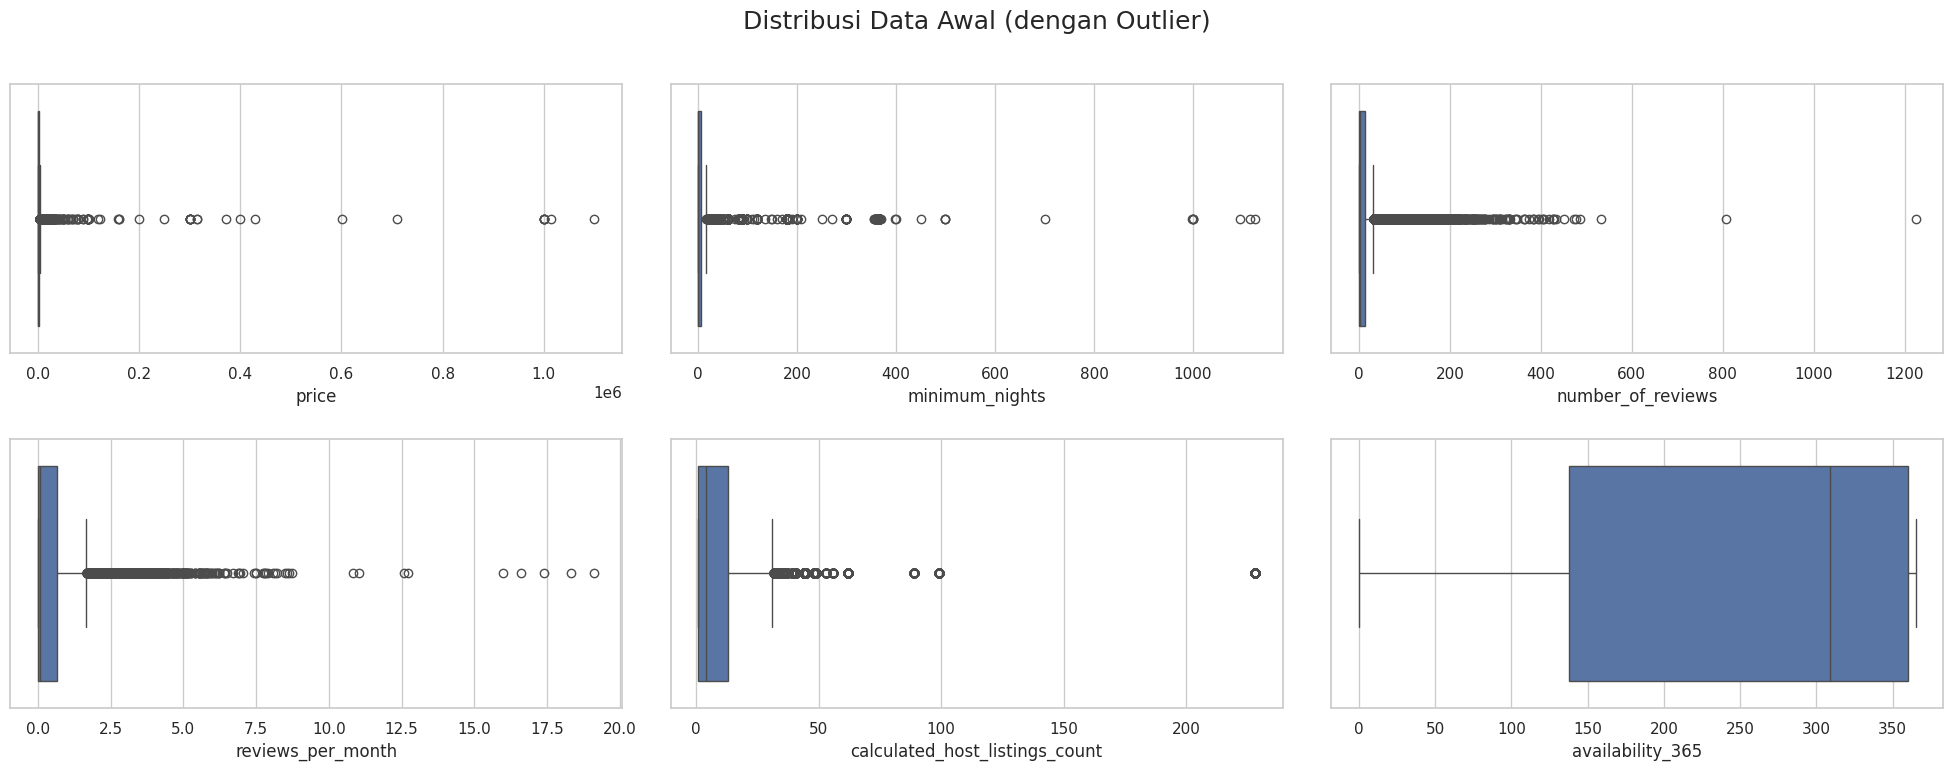

In [290]:
#Visualisasi data
columns_outlier = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

plt.figure(figsize=(20,8)).suptitle("Distribusi Data Awal (dengan Outlier)", fontsize=18)

for i, columns in enumerate(columns_outlier, start=1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[columns])

plt.tight_layout(pad=2.0)
plt.show()

Text(0, 0.5, 'Harga')

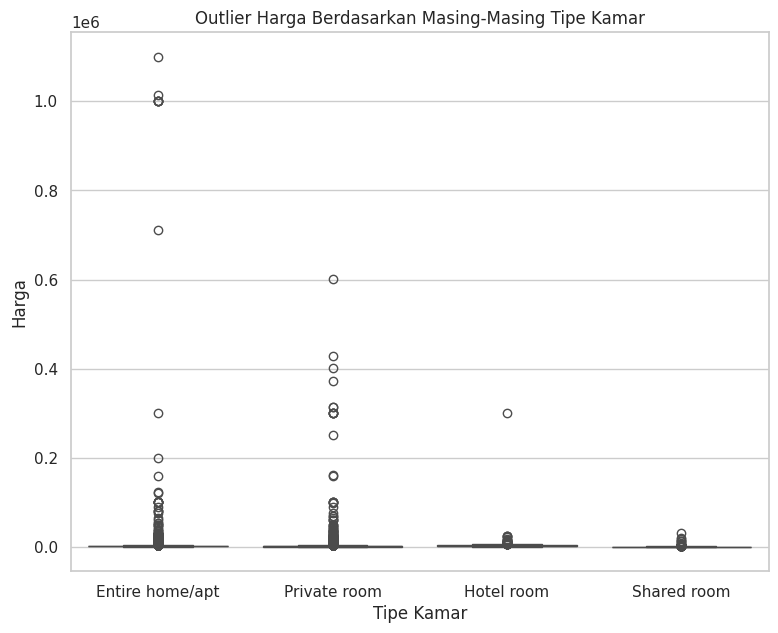

In [291]:
# akan dicek antara tipe kamar dengan harga
plt.figure(figsize=(9,7))
sns.boxplot(x='room_type',y='price',data=df)
plt.title('Outlier Harga Berdasarkan Masing-Masing Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')

In [292]:
for columns in columns_outlier:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers=df[(df[columns] < lower_bound) | (df[columns] > upper_bound)][columns]

    print(f"[{columns}]")
    print(f"Nilai batas bawah dari kolom {columns} adalah {lower_bound} dan nilai batas atasnya adalah {upper_bound}.")
    print(f"Outliers pada {columns} adalah sebanyak {outliers.count()} data atau sebesar {round(outliers.count()/df.shape[0]*100,2)}%\n")

[price]
Nilai batas bawah dari kolom price adalah -1393.5 dan nilai batas atasnya adalah 4722.5.
Outliers pada price adalah sebanyak 1403 data atau sebesar 8.86%

[minimum_nights]
Nilai batas bawah dari kolom minimum_nights adalah -8.0 dan nilai batas atasnya adalah 16.0.
Outliers pada minimum_nights adalah sebanyak 3168 data atau sebesar 20.0%

[number_of_reviews]
Nilai batas bawah dari kolom number_of_reviews adalah -19.5 dan nilai batas atasnya adalah 32.5.
Outliers pada number_of_reviews adalah sebanyak 2240 data atau sebesar 14.14%

[reviews_per_month]
Nilai batas bawah dari kolom reviews_per_month adalah -1.0050000000000001 dan nilai batas atasnya adalah 1.6750000000000003.
Outliers pada reviews_per_month adalah sebanyak 1471 data atau sebesar 9.29%

[calculated_host_listings_count]
Nilai batas bawah dari kolom calculated_host_listings_count adalah -17.0 dan nilai batas atasnya adalah 31.0.
Outliers pada calculated_host_listings_count adalah sebanyak 1823 data atau sebesar 11.51%

Pada hasil identifikasi di atas, dapat diketahui bahwa hanya kolom availability_365 yang tidak memiliki outlier dengan presentase sebesar 0%. Sedangkan kolom lainnya, memiliki outlier dengan detail sebagai berikut:

- kolom minimum_nights sebanyak 3168 data atau sebesar 20%
- kolom price sebanyak 1403 data atau sebesar 8.86%
- kolom number_of_reviews sebanyak 2240 data atau sebesar 14.14%

Outlier pada kolom-kolom tersebut diputuskan untuk tetap dipertahankan dan tidak ditindaklanjuti lebih jauh,

karena value pada setiap kolomnya masih dalam tahap yang masuk akal. Mengingat kebijakan mengenai penentuan minimum_nights dan price dilakukan oleh setiap host dengan pertimbangannya masing-masing. Sedangkan availability_365 dan number_of_reviews merupakan hasil interaksi organik antara host dan juga guest dalam melakukan booking dan juga memberikan review, di mana itu bukan sesuatu yang bisa dikendalikan.

In [293]:
#Pengujian Normalitas
alpha = 0.05

for columns in columns_outlier:
    statistic, p_value = shapiro(df[columns])
    print(f'[{columns}]')
    print('Nilai Statistik Uji:', round(statistic, 3))
    print('p-value:', p_value)
    if p_value < alpha:
        print('Data tidak terdistribusi normal.\n')
    else:
        print('Data terdistribusi normal.\n')

[price]
Nilai Statistik Uji: 0.044
p-value: 0.0
Data tidak terdistribusi normal.

[minimum_nights]
Nilai Statistik Uji: 0.28
p-value: 0.0
Data tidak terdistribusi normal.

[number_of_reviews]
Nilai Statistik Uji: 0.441
p-value: 0.0
Data tidak terdistribusi normal.

[reviews_per_month]
Nilai Statistik Uji: 0.579
p-value: 0.0
Data tidak terdistribusi normal.

[calculated_host_listings_count]
Nilai Statistik Uji: 0.417
p-value: 0.0
Data tidak terdistribusi normal.

[availability_365]
Nilai Statistik Uji: 0.832
p-value: 0.0
Data tidak terdistribusi normal.



Karena memiliki banyak outlier dengan nilai yang cukup ekstrem, dapat disimpulkan bahwa data-data yang terdapat pada kolom-kolom tersebut tidak terdistribusi normal. Namun, untuk memvalidasi pernyataan tersebut, tetap dilakukan pengujian normalitas menggunakan metode Shapiro-Wilk pada kolom minimum_nights, availability_365, price, dan number_of_reviews. Dan hasilnya adalah memang benar, bahwa semua data pada kolom tersebut tidak terdistribusi normal.

In [294]:
# Menampilkan data dengan nilai sama dengan 0 pada kolom 'price'
data_0 = len(df[(df['price'] == 0)])

# Menampilkan data dengan nilai antara 1 dan 100 pada kolom 'price'
data_1_to_100 = len(df[(df['price'] > 0) & (df['price'] < 100)])

# Menampilkan data dengan nilai lebih besar dari 25.000 pada kolom 'price'
data_gt_25000 = len(df[df['price'] > 25000])

print(f"Data dengan nilai sama dengan 0 pada kolom 'price':{data_0}")

print(f"Data dengan nilai antara 0 dan 100 pada kolom 'price':{data_1_to_100}")

print(f"Data dengan nilai lebih besar dari 25.000 pada kolom 'price':{data_gt_25000}")

Data dengan nilai sama dengan 0 pada kolom 'price':0
Data dengan nilai antara 0 dan 100 pada kolom 'price':0
Data dengan nilai lebih besar dari 25.000 pada kolom 'price':103


##### 2. Nilai `minimum_nights` yang lebih dari 100 hari (artinya properti tidak disewakan untuk jangka pendek).

In [295]:
# Menampilkan data dengan nilailebih dari 100 (hari) pada kolom 'minimum_nights'
data_gt_100days = len(df[(df['minimum_nights'] > 100)])
print(f"jumlah properti yang memiliki minimum stay lebih dari 100 (hari):{data_gt_100days}")

jumlah properti yang memiliki minimum stay lebih dari 100 (hari):428


In [296]:
df['minimum_nights'].unique()

array([   3,    1,   60,    7,  250,    2,   15,   30,   28,   21,   27,
          4,  180,   90,    5,  358, 1125,   29,   14,  200,  365,  120,
          9,   12,  300,  360,  100,   10,   45,   23,    6,   84,  370,
         24,   31,   50,   19,   20,   75,    8,   25,   40,   26,   59,
         58,  170,  399,  998,   13,   22,  356,   16,  183,  700,  150,
         35,  355,  500,   89,   80,   18,   11,   85,  135,  198,   88,
        160,  109,  148,   51, 1115,  113,   62,  450,  270,   55,  208,
       1000,   17,  999,  400,   99, 1095,   39,  190,  364])

Disini saya akan membuat kolom baru bernama stay_type dimana kolom ini berisi pengelompokkan lama menginap dari kolom minimum_nights yang terdiri dari 86 data. Saya akan memabagi menjadi 3 bagian seperti;

- Short-Term : minimum_nights dibawah 7 hari atau dibawah 1 minggu
- Medium-Term :minimum_nights 8 hari - 31 hari atau 1 minggu - 1 bulan.
- Long-Term : minimum_nights diatas 31 atau 1 bulan.

Dengan adanya pengelompokkan tersebut, akan memudahkan saya dalam melakukan analisis.

In [297]:
def kategori_mn(minimum_nights):
    if minimum_nights < 28:
        return 'Short-Term'
    else:
        return 'Long-Term'

# nama kolom baru
df['stay_type'] = df['minimum_nights'].apply(kategori_mn)
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0,Short-Term
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,Not Reviewed,0.0,2,358,0,Short-Term
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,Not Reviewed,0.0,1,365,0,Long-Term


##### 3. Nilai 0 pada kolom`availability_365` (properti tidak dapat disewa sama sekali sepanjang tahun)

In [298]:
# Menampilkan data dengan nilai sama dengan 0 pada kolom 'availability_365'
data_0_avalability = len(df[(df['availability_365'] == 0)])
print(f"jumlah properti yang tidak dapat disewakan sepanjang tahun (avalability = 0): {data_0_avalability}")

jumlah properti yang tidak dapat disewakan sepanjang tahun (avalability = 0): 856


##### 4. Property yang memiliki `nama`  yang dituliskan tidak hanya dengan alfabet Latin (sulit untuk dipahami oleh calon penyewa)

Pengecekan terhadap nama properti dilakukan 2 kali untuk 2 katagori yang berbeda:
1. Name properti yang menggunakan bukan karakter Latin lebih dari 5 karakter
2. Nama properti yang mengandung tidak hanya karakter Latin (1 atau lebih Karakter)

In [299]:
import re

# Membuat pola ekspresi reguler untuk mencocokkan 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter
# pola = re.compile(r'[^\u0000-\u007F]+')
pola = re.compile(r'[^\u0000-\u007F]{5,}')

# Memeriksa data pada kolom 'name' yang tidak memenuhi pola
nama_non_latin_5kar = len(df[df['name'].str.contains(pola, na=False)])
nama_non_latin = df.loc[df['name'].str.contains(pola, na=False), ['name']]

print(f"Jumlah data pada kolom 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter:{nama_non_latin_5kar}")
print("\n")
print(len(nama_non_latin))

Jumlah data pada kolom 'name' yang menggunakan bukan karakter Latin lebih dari 5 karakter:1650


1650


In [300]:
# Membuat pola ekspresi reguler untuk mencocokkan nama yang mengandung tidak hanya karakter Latin
pola = re.compile(r'[^\u0000-\u007F]+')

# Memeriksa data pada kolom 'name' yang tidak memenuhi pola
jumlah_nama_non_latin = len(df[df['name'].str.contains(pola, na=False)])
nama_non_latin = df.loc[df['name'].str.contains(pola, na=False), ['name']]

print(f"Jumlah data pada kolom 'name' yang menggunakan tidak hanya karakter Latin:{jumlah_nama_non_latin}")
print("\n")
print(len(nama_non_latin))

Jumlah data pada kolom 'name' yang menggunakan tidak hanya karakter Latin:2779


2779


#### `language` based on listings' `name`
Di sini, kita melihat apakah judul listing mengandung karakter/huruf latin atau tidak. Jika judul mengandung huruf selain huruf latin, kita kategorikan sebagai 'Not English'. Jika judul mengandung huruf latin saja, kita kategorikan sebagai 'English'.

In [301]:
def remove_emojis(text):
    return ''.join(c for c in text if (emoji.is_emoji(c) == False))

# Fungsi untuk menghapus emoji/simbol dalam judul listing
def remove_misc_symbols(text):
    emoji_pattern = re.compile(pattern="["
                                     u"\U0001F600-\U0001F64F"  # Emojis in the Miscellaneous Symbols and Faces range
                                     u"\U0001F300-\U0001F5FF"  # Emojis in the Miscellaneous Symbols range
                                     u"\U0001F680-\U0001F6FF"  # Emojis in the Transport and Map Symbols range
                                     u"\U0001F700-\U0001F77F"  # Emojis in the Alchemical Symbols range
                                     u"\u2600-\u26FF"  # Miscellaneous Symbols range
                                     u"\u2700-\u27BF"  # Dingbats and Miscellaneous Symbols range
                                     u"\u25A0-\u25FF" # Geometric Shapes range
                                     u"\u1D10-\u1D1F" # Musical Symbols range
                                     u"\u2460-\u24FF" # Enclosed Alphanumeric range
                                     "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Fungsi untuk mengecek apakah listing menggunakan huruf latin atau tidak
def contains_only_english_words(input_string):
    pattern = r'^[a-zA-Z0-9\s' + re.escape(string.punctuation) + ']+$'
    return re.match(pattern, input_string) is not None


# Buat kolom baru yang merupakan judul listing tanpa emoji
df['name_no_emoji'] = df['name'].apply(remove_emojis)
df['name_no_emoji'] = df['name_no_emoji'].apply(remove_misc_symbols)

# Dari kolom baru tersebut, emoji sudah dihapuskan. Sekarang, kita bisa menentukan apakah listing berbahasa Inggris atau tidak
df['language'] = df['name_no_emoji'].apply(contains_only_english_words)
df['language'] = np.where(df['language'], 'English', 'Not English')

# Hapus kolom 'name_no_emoji' karena kolom tersebut tidak akan kita pakai lagi
df = df.drop(['name_no_emoji'], axis = 1)
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,language
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0,Short-Term,English
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,Not Reviewed,0.0,2,358,0,Short-Term,English
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,Not Reviewed,0.0,1,365,0,Long-Term,English


#### 5. `reviews_per_month` as popularity
Seperti yang kita tahu, untuk dapat meninggalkan review, user harus sudah pernah menyewa dan membayar lewat Airbnb. Maka dari itu, kita dapat menggunakan `reviews_per_month` sebagai acuan populeritas dari sebuah listing.

In [302]:
# Definisikan fungsi untuk mengubah nilai 'popularity' berdasarkan nilai 'number_of_reviews'
def assign_popularity(num_reviews):
    if num_reviews > upper_bound:
        return 'popular'
    else:
        return 'unpopular'

# Hitung nilai IQR
Q1 = df['reviews_per_month'].quantile(0.25)
Q3 = df['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas untuk outlier
upper_bound = Q3 + 1.5 * IQR
print('Upper bound =', upper_bound)
# Terapkan fungsi ke kolom 'number_of_reviews' untuk membuat kolom 'popularity'
df['popularity'] = df['reviews_per_month'].apply(assign_popularity)
df.head(3)

Upper bound = 1.6750000000000003


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,language,popularity
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0,Short-Term,English,unpopular
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,Not Reviewed,0.0,2,358,0,Short-Term,English,unpopular
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,Not Reviewed,0.0,1,365,0,Long-Term,English,unpopular


## Tahap Analisa Data
data yang sudah bersih dan selesai dianalisa dapat dianalisa dengan menggunakan tableu

In [303]:
df.to_excel('airbnb_clean.xlsx')

## Membagi bangkok berdasarkan area yang dimiliki :    

In [304]:
area_mapping = {
    'Bang Sue': 'North Bangkok','Lak Si': 'North Bangkok','Sai Mai': 'North Bangkok','Chatu Chak' : 'North Bangkok','Don Mueang': 'North Bangkok','Bang Khen': 'North Bangkok','Chatuchak': 'North Bangkok',
    'Bang Kapi': 'East Bangkok', 'Lat Krabang': 'East Bangkok', 'Wang Thong Lang': 'East Bangkok', 'Nong Chok': 'East Bangkok', 'Bueng Kum': 'East Bangkok', 'Min Buri': 'East Bangkok',
    'Saphan Sung' :'East Bangkok', 'Khlong Sam Wa': 'East Bangkok', 'Lat Phrao' : 'East Bangkok', 'Khan Na Yao': 'East Bangkok',
    'Bangkok Yai': 'West Bangkok', 'Khlong San' : 'West Bangkok', 'Thon buri' : 'West Bangkok', 'Thon Buri': 'West Bangkok', 'Thung khru': 'West Bangkok', 'Bang Phlat': 'West Bangkok',
    'Taling Chan': 'West Bangkok', 'Phasi Charoen': 'West Bangkok', 'Bang Khae': 'West Bangkok', 'Bangkok Noi': 'West Bangkok',
    'Sathon': 'South Bangkok', 'Phra Khanong' : 'South Bangkok', 'Yan Nawa': 'South Bangkok', 'Suanluang': 'South Bangkok', 'Bang Na' : 'South Bangkok', 'Bang Kho laen' : 'South Bangkok',
    'Bang Kho Laem': 'South Bangkok', 'Rat Burana': 'South Bangkok', 'Yan na wa': 'South Bangkok',
    'Ratchathewi': 'Central Bangkok', 'Pra Wet' : 'Central Bangkok', 'Parthum Wan': 'Central Bangkok', 'Din Daeng': 'Central Bangkok', 'Khlong Toei': 'Central Bangkok','Phaya Thai': 'Central Bangkok',
    'Vadhana': 'Central Bangkok', 'Huai Khwang': 'Central Bangkok', 'Bang Rak': 'Central Bangkok', 'Pathum Wan': 'Central Bangkok', 'Phra Nakhon': 'Central Bangkok', 'Dusit': 'Central Bangkok',
    'Pom Prap Sattru Phai': 'Central Bangkok', 'Samphanthawong': 'Central Bangkok',
    'Bang Bon': 'Outer Western Bangkok', 'Chom Thong': 'Outer Western Bangkok','Thawi Watthana': 'Outer Western Bangkok', 'Bang Khun thain': 'Outer Western Bangkok','Nong Khaem': 'Outer Western Bangkok'
}

df['area'] = df['neighbourhood'].map(area_mapping)
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,language,popularity,area
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0,Short-Term,English,unpopular,Central Bangkok
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,Not Reviewed,0.0,2,358,0,Short-Term,English,unpopular,South Bangkok
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,Not Reviewed,0.0,1,365,0,Long-Term,English,unpopular,East Bangkok


## 1. Persebaran data AirBNB Bangkok

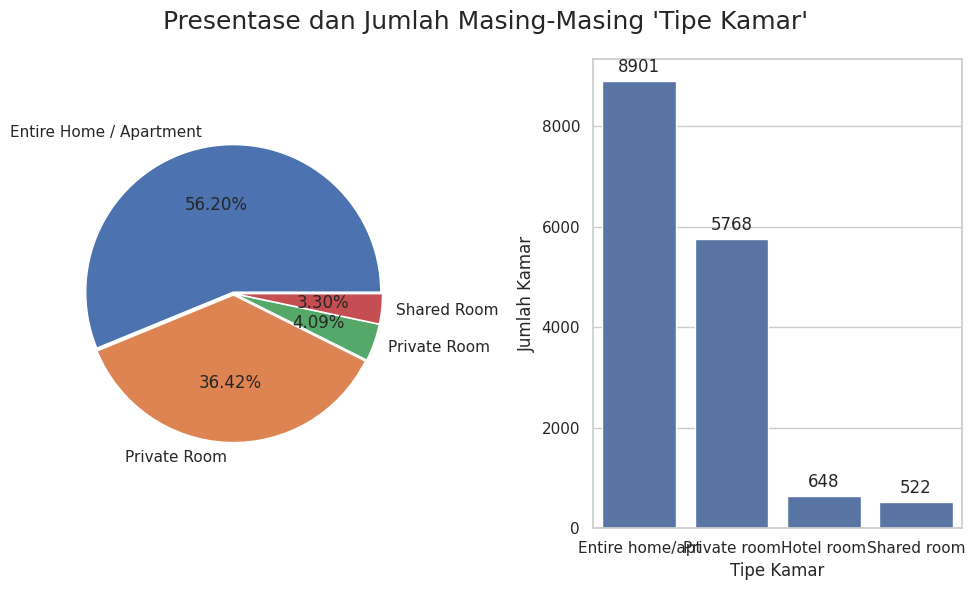

In [305]:
#Visualisasi grafik jumlah masing-masing `Tipe Kamar`
#pie plot
plt.figure(figsize=(10,6)).suptitle("Presentase dan Jumlah Masing-Masing 'Tipe Kamar'", fontsize=18)
plt.subplot(1,2,1)
plt.pie(df['room_type'].value_counts(), labels=['Entire Home / Apartment','Private Room', 'Private Room', 'Shared Room'], autopct='%.2f%%', explode=(0.01, 0.01, 0.01, 0.01))

#count plot
plt.subplot(1,2,2)
ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
for val in ax.patches:
    ax.annotate(f'{int(val.get_height())}', (val.get_x() + val.get_width() / 2., val.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Kamar')

plt.tight_layout()
plt.show()

Dari keempat jenis kamar berikut adalah deskripsi per masing - masing kamar :

Entire home/apt (Seluruh Rumah/Apartemen):

Umumnya disewa untuk jangka waktu yang lebih lama, seperti beberapa hari hingga beberapa minggu.
Cocok untuk tamu yang mencari privasi dan kenyamanan seperti tinggal di rumah sendiri.
Menyediakan fasilitas lengkap, seperti dapur, ruang tamu, kamar tidur, dan kamar mandi pribadi.

Private room (Kamar Pribadi):

Biasanya disewa untuk jangka waktu yang bervariasi, mulai dari beberapa hari hingga beberapa minggu.
Cocok untuk tamu yang menginginkan privasi tetapi tidak memerlukan ruang yang banyak.
Biasanya memiliki fasilitas seperti kamar tidur pribadi dan kamar mandi, tetapi fasilitas umum seperti dapur dan ruang tamu mungkin dibagi dengan pemilik atau tamu lain.

Hotel room (Kamar Hotel):

Biasanya disewa untuk jangka waktu singkat, seperti satu atau beberapa malam.
Cocok untuk tamu yang mencari kenyamanan dan fasilitas layanan hotel.
Menyediakan fasilitas seperti tempat tidur, kamar mandi pribadi, dan beberapa fasilitas tambahan seperti restoran, kolam renang, atau gym yang terletak di hotel.

Shared room (Kamar Bersama):

Biasanya disewa untuk jangka waktu yang singkat, seperti beberapa malam atau penginapan sementara.
Cocok untuk tamu yang mencari akomodasi dengan biaya rendah dan siap berbagi ruangan dengan tamu lain.
Biasanya memiliki fasilitas umum yang dibagi dengan tamu lain, seperti tempat tidur bersama, kamar mandi bersama, dan ruang umum yang mungkin termasuk dapur atau ruang tamu.

In [306]:
# jumlah listing berdasarkan zona/area
listing = df['area'].value_counts()
listing

area
Central Bangkok          9733
South Bangkok            2593
West Bangkok             1318
North Bangkok            1246
East Bangkok              828
Outer Western Bangkok     121
Name: count, dtype: int64

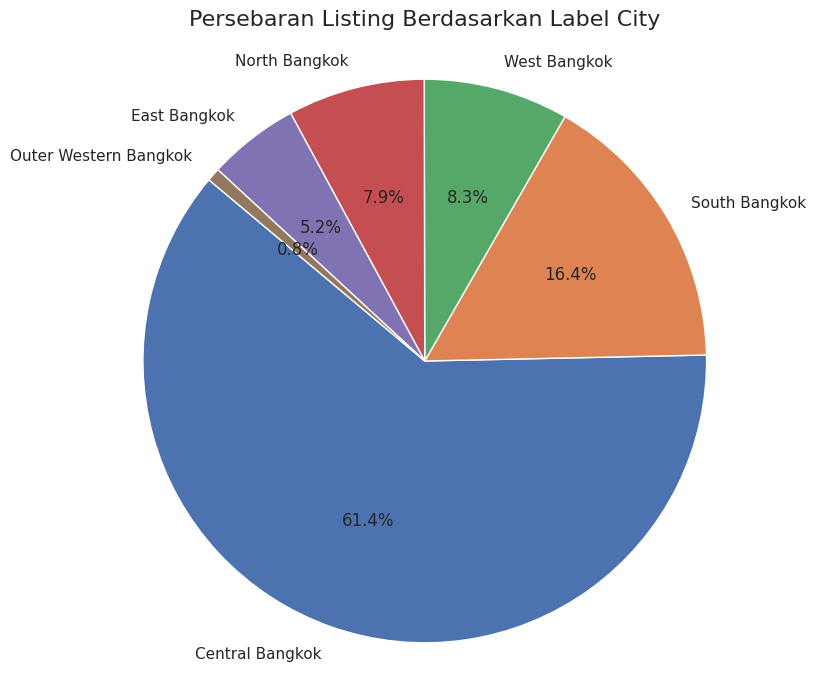

In [307]:
# visualisasi
color = ['#fb9b6c','#7e6570','#75a993']
plt.figure(figsize=(8,8))
plt.title('Persebaran Listing Berdasarkan Label City',pad= 20,size=16)
plt.pie(listing, labels=listing.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [308]:
#Dataframe tipe kamar terfavorit berdasarkan jumlah review
df_room_group = df.groupby(['room_type'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
df_room_group

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Private room,50710
2,Hotel room,12700
3,Shared room,2682


#### Mengetahui Puncak Kunjungan Wisatawan ke Bangkok

Pada dataset ini terdapat data kunjungan sejak tahun 2012 hingga tahun 2022. Sehingga dapat dilakukan beberapa analisa pada rentang tahun tersebut.

> Sebelum menganalisa lebih jauh, terlebih dahulu diidentifikasi mengenai data `last_review` yang diasumsikan sebagai hari atau tanggal di mana seorang tamu menginap.

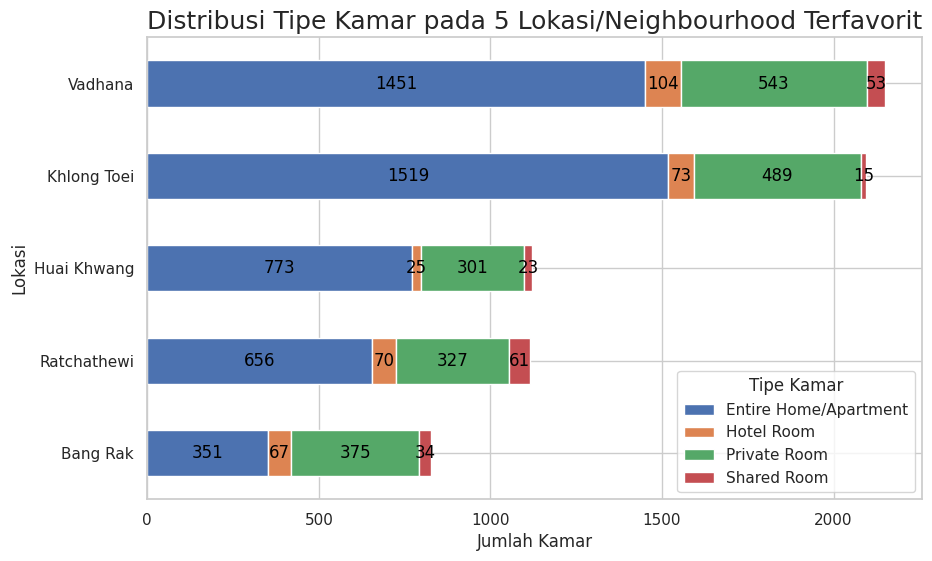

In [309]:
# Lokasi dengan listig terbanyak dan berdasarkan dengan tipe kamarnya
df_type_home = df.query("""room_type == 'Entire home/apt'""").groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).head(10).reset_index()
df_type_private = df.query("""room_type == 'Private room'""").groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).head(10).reset_index()
df_type_hotel = df.query("""room_type == 'Hotel room'""").groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).head(10).reset_index()
df_type_shared = df.query("""room_type == 'Shared room'""").groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).head(10).reset_index()

# Menggabungkan data menjadi satu dataframe
df_combined = pd.concat([df_type_home, df_type_private, df_type_hotel, df_type_shared], keys=['Entire Home/Apartment', 'Private Room', 'Hotel Room', 'Shared Room'])

# Mengambil hanya 10 lokasi teratas dengan jumlah kamar terbanyak
top_locations = df_combined.groupby('neighbourhood')['id'].sum().sort_values(ascending=False).head(5).index

# Filter hanya lokasi teratas
df_filtered = df_combined[df_combined['neighbourhood'].isin(top_locations)]

# Mengubah data menjadi bentuk yang sesuai dengan grafik
df_pivot = df_filtered.pivot_table(index='neighbourhood', columns=df_filtered.index.get_level_values(0), values='id', fill_value=0)

# Menyortir setiap lokasi secara terpisah berdasarkan jumlah kamar terbanyak
df_pivot_sorted = df_pivot.loc[df_pivot.sum(axis=1).sort_values(ascending=True).index]

# Plotting
ax = df_pivot_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_xlabel('Jumlah Kamar')
ax.set_ylabel('Lokasi')
ax.set_title('Distribusi Tipe Kamar pada 5 Lokasi/Neighbourhood Terfavorit', fontsize=18)
ax.legend(title='Tipe Kamar')

# Menambahkan label
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.text(left + width / 2, bottom + height / 2, f'{int(width)}', ha='center', va='center', color='black')

plt.show()

>- Terlihat bahwa tipe kamar 'Entire Home/Apartment' secara garis besar terlihat mendominasi kelima lokasi di atas. Hanya Bang Rak yang memiliki komposisi perbandingan jumlah tipe kamar 'Entire Home/Apartment' dan 'Private Room' yang kurang lebih sama dengan perbedaan sangat tipis.
>- Tipe 'Shared Room' merupakan tipe kamar yang paling sedikit dimiliki oleh setiap lokasi.

Selain itu, kita juga bisa mengetahui apakah jumlah penginapan Airbnb tersebut berpengaruh terhadap dari jumlah kunjungan para tamu/turis pada masing-masing daerahnya.

## Distribusi Tipe kamar pada area disekitar bangkok

In [310]:
cross_tab = pd.crosstab(df['area'], df['room_type'])
print(cross_tab)

room_type              Entire home/apt  Hotel room  Private room  Shared room
area                                                                         
Central Bangkok                   5646         527          3159          401
East Bangkok                       352          15           435           26
North Bangkok                      585          20           624           17
Outer Western Bangkok               60           0            58            3
South Bangkok                     1608          47           893           45
West Bangkok                       650          39           599           30


In [311]:
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")

Chi-square statistic: 452.2466460282453
P-value: 6.912092273014721e-87
Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.


In [312]:
# groupby listing berdasarkan district
district = df.groupby(['neighbourhood','area'])[['name']].count().sort_values(by='name',ascending=False).reset_index()

# top
top_15 = district.head(15)
display(top_15)
bottom_5 = district.tail()
display(bottom_5)


,neighbourhood,area,name
0,Vadhana,Central Bangkok,2151
1,Khlong Toei,Central Bangkok,2096
2,Huai Khwang,Central Bangkok,1122
3,Ratchathewi,Central Bangkok,1114
4,Bang Rak,Central Bangkok,827
5,Sathon,South Bangkok,802
6,Phra Nakhon,Central Bangkok,618
7,Phra Khanong,South Bangkok,558
8,Chatu Chak,North Bangkok,548
9,Bang Na,South Bangkok,458


,neighbourhood,area,name
45,Bang Khun thain,Outer Western Bangkok,21
46,Nong Chok,East Bangkok,14
47,Thawi Watthana,Outer Western Bangkok,12
48,Nong Khaem,Outer Western Bangkok,9
49,Bang Bon,Outer Western Bangkok,5


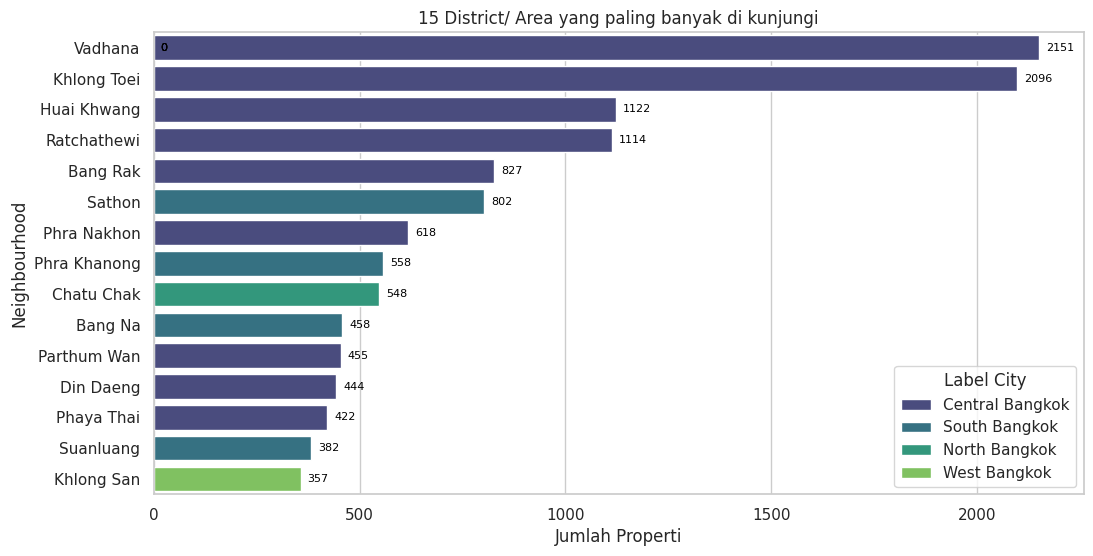

In [313]:
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name', y='neighbourhood', hue='area', data=top_15, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.title('15 District/ Area yang paling banyak di kunjungi')

# Menampilkan legend
plt.legend(title='Label City')

# Menambahkan nilai di dalam bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                      textcoords='offset points')

# Menampilkan plot
plt.show()

In [314]:
#bottom
bottom_5_by_city = district.groupby('area').tail()

> Menariknya, lokasi yang memiliki jumlah listings penginapan Airbnb tidak membuatnya menjadi lokasi yang paling banyak diminati oleh para tamu/turis.
>- Khlong Toei, Vadhana, Sathon, Ratchatdewi, dan Huai Khwang jadi lima lokasi favorit dari para tamu/turis untuk menginap selama di Bangkok.
>- Khlong Toei jadi lokasi terfavorit bagi para tamu/turis dalam memilih akomodasi selama berkunjung ke Bangkok dengan total 41281 pengunjung yang tercatat. Menjadikannya sebagai lokasi paling strategis para tamu/turis untuk melakukan mobilisasi. Posisinya bertukar dengan Vadhana yang menempati posisi kedua.
>- Terjadi selisih yang cukup signifikan antara posisi kedua dan ketiga, yaitu Vadhana dan Sathon dalam jumlah kunjungan tamu/turis.

Pada dataset ini, selain mengetahui jumlah akumulasi dari penginapan yang terdaftar di Airbnb ataupun persebaran di setiap lokasinya, kita juga bisa mengetahui siapa host atau pemilik dari masing-masing penginapan tersebut. Sekaligus mengidentifikasi siapakah host yang memiliki penginapan Airbnb paling banyak yang tersebar di Bangkok.

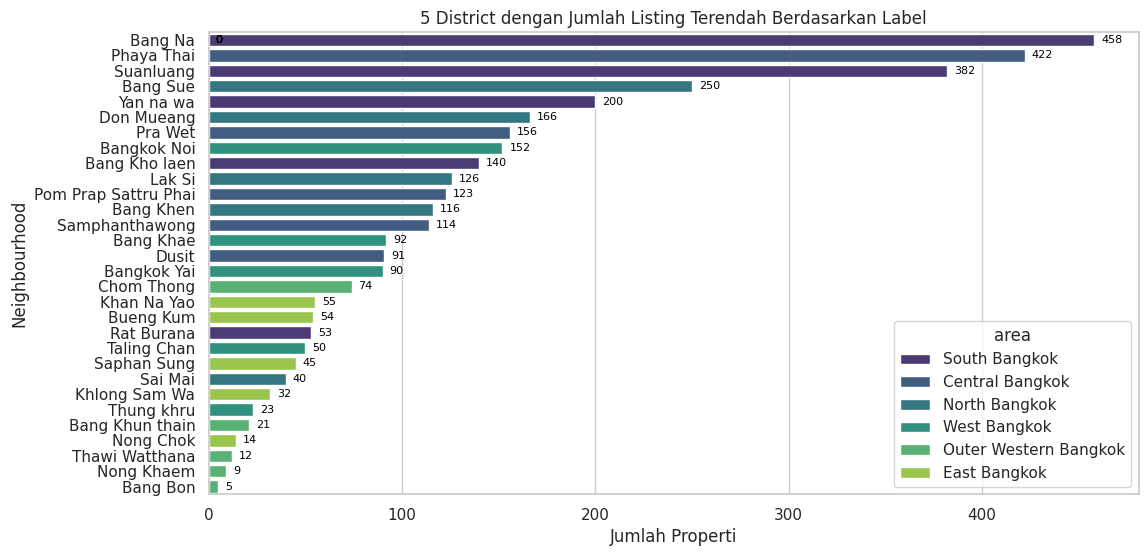

In [315]:
sns.set(style="whitegrid")

# Membuat bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name', y='neighbourhood', hue='area', data=bottom_5_by_city, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Jumlah Properti')
plt.ylabel('Neighbourhood')
plt.title('5 District dengan Jumlah Listing Terendah Berdasarkan Label')

# Menampilkan legend
plt.legend(title='area')

# Menambahkan nilai di dalam bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                      textcoords='offset points')

# Menampilkan plot
plt.show()

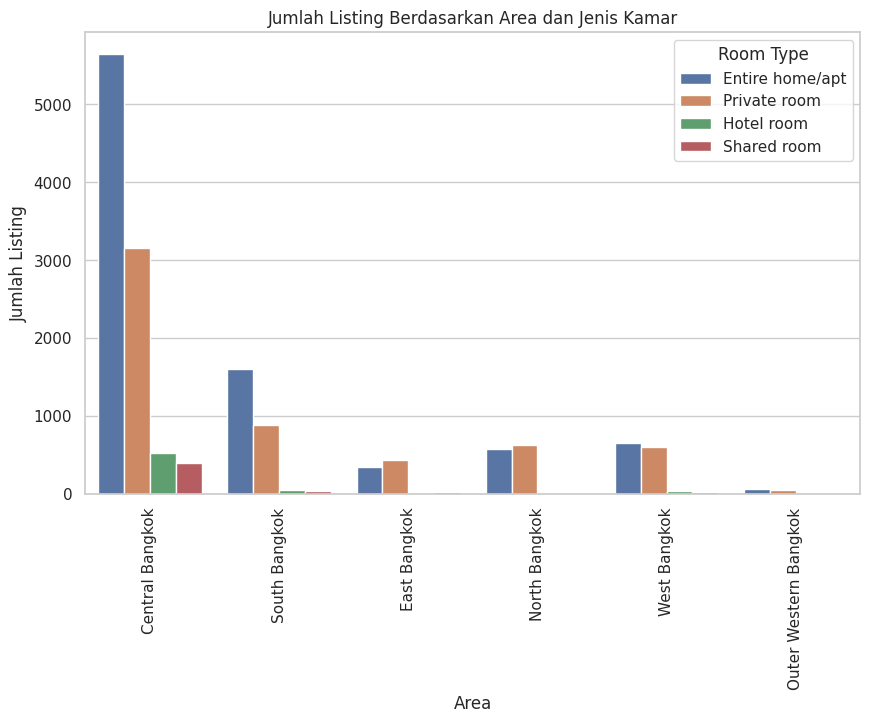

In [316]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='area', hue='room_type')
plt.xlabel('Area')
plt.ylabel('Jumlah Listing')
plt.title('Jumlah Listing Berdasarkan Area dan Jenis Kamar')
plt.legend(title='Room Type')
plt.xticks(rotation=90)
plt.show()

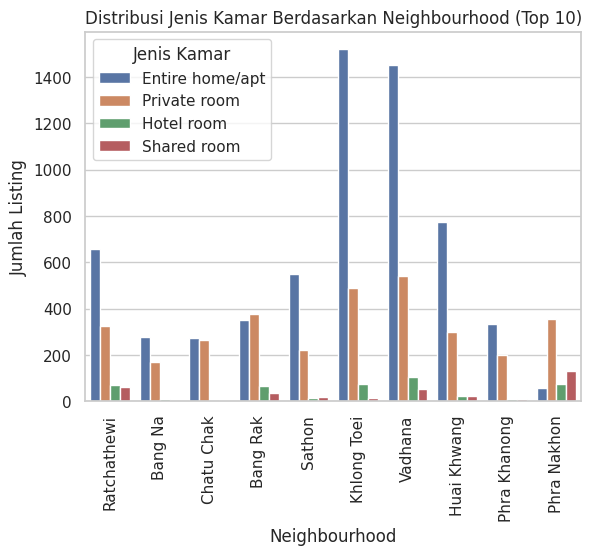

In [317]:
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index
df_top_neighbourhoods = df[df['neighbourhood'].isin(top_neighbourhoods)]

sns.countplot(data=df_top_neighbourhoods, x='neighbourhood', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.title('Distribusi Jenis Kamar Berdasarkan Neighbourhood (Top 10)')
plt.legend(title='Jenis Kamar')
plt.show()

## Insight :
Terdapat jumlah yang sangat signifikan dalam kamar jenis Entire home/apt khususnya di daerah Central Bangkok dan Neighbourhood yang memiliki jumlah listing terbanyak juga masuk ke dalam wilayah Central Bangkok. Penyewa lebih tertarik untuk menyewa dan menetap di daerah Central Bangkok. Dimana penyewa menginginkan akses yang dekat dengan kota, kelengkapan fasilitas dan sarana serta kemudahan transportasi.

In [318]:
#Dataframe 5 host yang memiliki penginapan terbanyak di Bangkok
df_host_group = df.groupby(['host_name'])['calculated_host_listings_count'].count().sort_values(ascending=False).reset_index().head(5)
df_host_group = pd.DataFrame(df_host_group)
df_host_group

,host_name,calculated_host_listings_count
0,Curry,228
1,Noons,98
2,K,91
3,Pornchai,63
4,Dusadee,62


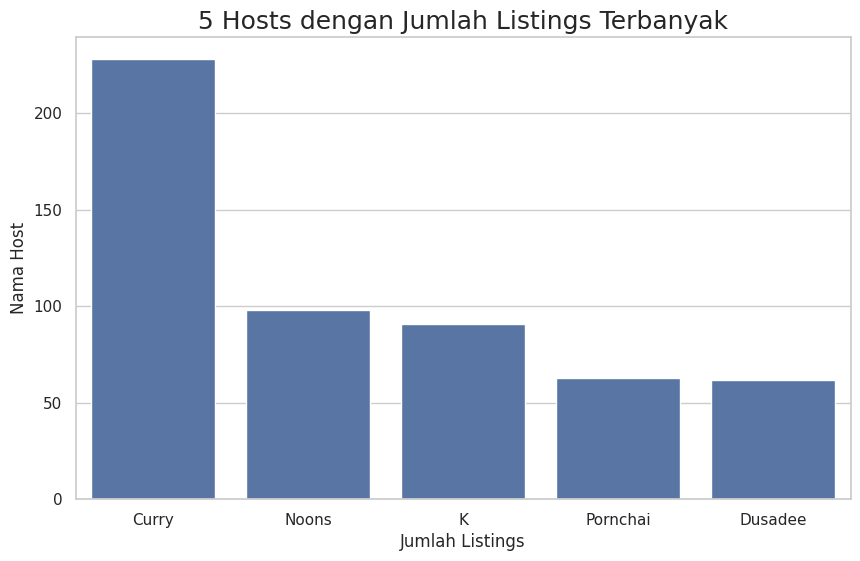

In [319]:
#Visualisasi barplot
plt.figure(figsize=(10,6))
sns.barplot(y='calculated_host_listings_count', x='host_name', data=df_host_group)
plt.xlabel('Jumlah Listings')
plt.ylabel('Nama Host')
plt.title('5 Hosts dengan Jumlah Listings Terbanyak', size=18)
plt.show()

> Secara garis besar, dari keseluruhan penginapan Airbnb yang tersebar di Bangkok, sebanyak 228 kamar di antaranya dimiliki oleh Curry. Lalu disusul oleh Noons sebanyak 99 kamar, K sebanyak 91 kamari, Pornchai sebanyak 63 kamar, dan Dusadee sebanyak 62 kamar.
>
> Kepemilikan yang mendominasi ini bisa dilihat juga sebagai sebuah monopoli di mana pada akhirnya tamu memiliki kesempatan lebih besar untuk menginap di tempat yang dimiliki Curry. Menyebabkan pendapatan yang didapatkan dari sektor pariwisata (dalam konteks akomodasi) menjadi tidak merata untuk pemilik penginapan Airbnb lainnya.
>
> Sesuatu yang harus dibuatkan regulasinya agar benefit ekonomi dari kedatangan para tamu/turis ke Bangkok bisa tersebar kepada para pengusaha penginapan lokal secara merata.

## Analisa Harga Tipe Kamar

 ### **Analysis on `price` according to its `room_type` (Kruskal-Wallis Test)**
 Analisis harga berdasarkan tipe kamar membantu host untuk memahami pasar secara lebih baik. Dengan mengetahui harga rata-rata untuk setiap tipe kamar, host dapat menyesuaikan harga mereka agar tetap kompetitif dan menarik bagi tamu.

In [320]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    3466.966521
Hotel room         3032.983025
Private room       3065.035714
Shared room         920.848659
Name: price, dtype: float64

Karena data pada variabel `price` tidak berdistribusi normal dan terdapat 4 kelompok, kita akan menggunakan Kruskal-Wallis test untuk melihat apakah terdapat perbedaan signifikan antara tarif harian dari masing-masing `room_type`.


Hipotesis:

H0: median1 = median2 = median3 = median4

H1: Setidaknya ada satu pasang room_type yang memiliki tarif per hari yang berbeda

Tingkat signifikansi (alpha) = 0.05

In [321]:
home = df[df['room_type'] == 'Entire home/apt']['price']
priv = df[df['room_type'] == 'Private room']['price']
hotel = df[df['room_type'] == 'Hotel room']['price']
share = df[df['room_type'] == 'Shared room']['price']

fscore, pval = kruskal(home, priv, hotel, share)
print('p-value = ', pval)
if pval < 0.05:
    print("Tolak H0")
    print('Setidaknya ada satu pasang room_type yang memiliki median tarif per hari yang berbeda')
else:
    print('Gagal tolak H0')
    print('Tidak ada perbedaan signifikan antara median tarif per hari dari entire home, private room, hotel room, dan shared room')

p-value =  8.332607656702334e-257
Tolak H0
Setidaknya ada satu pasang room_type yang memiliki median tarif per hari yang berbeda


Dari uji Kruskal-Wallis, kita mengetahui bahwa setidaknya ada satu pasang room_type yang memiliki median tarif per hari yang berbeda, yang artinya terdapat hubungan antara `price` dan `room_type`.

Kita juga dapat membuat bar plot dari median `price` masing-masing room_type agar dapat mengobservasi perbedaannya

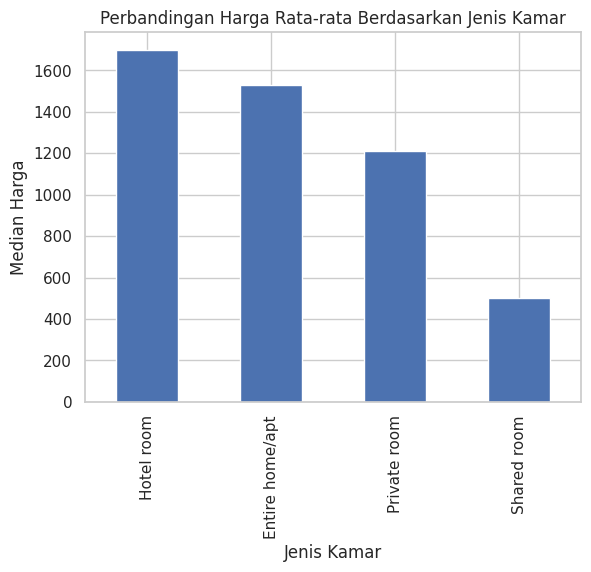

In [322]:
room_type_avg_price = df.groupby('room_type')['price'].median().sort_values(ascending=False)
room_type_avg_price.plot(kind='bar')
plt.xlabel('Jenis Kamar')
plt.ylabel('Median Harga')
plt.title('Perbandingan Harga Rata-rata Berdasarkan Jenis Kamar')
plt.show()

Insight :    
- Penyewa cenderung enggan untuk menyewa di Shared room dan lebih memilih Private room atau hotel untuk waktu yang singkat. Hal ini dapat dilihat dari grafik dimana ketersediaan Private room jauh lebih banyak dan Hotel room sedikit diatas Shared room. Hal ini karena Shared room cenderung berbagi kamar dengan penyewa lain sehingga penyewa pun tidak punya privasi di dalam kamar dan memiliki fasilitas yang minim. Jadi meskipun harga Shared room cenderung ekonomis penyewa lebih memilih kamar dengan opsi lain dengan harga rata rata yang tinggi dibanding dengan Shared room.

- Dari plot tersebut, kita dapat lihat bahwa median dari tarif masing-masing `room_type` berbeda satu sama lain. 'Hotel room' memiliki median tarif per hari yang paling tinggi, yaitu 1700 THB. Kemudian diikuti oleh 'Entire home/apt' dengan median tarif per hari 1536 THB, 'Private room' 1212 THB, dan yang paling rendah adalah 'Shared room' dengan median tarif per hari sebesar 500 THB.

- Analisis ini memungkinkan host untuk memahami posisi mereka dalam pasar dan membandingkan tarif mereka dengan kompetitor yang memiliki tipe kamar yang sama. Hal ini membantu mereka untuk membuat keputusan strategis dalam menetapkan harga mereka agar tetap kompetitif tetapi juga menguntungkan.

### **Analysis on `price` according to its `district`**
Analisis tarif berdasarkan district membantu host untuk memahami permintaan pasar di setiap `district`. Dengan mengetahui bagaimana tarif bervariasi di berbagai daerah, host dapat menyesuaikan harga mereka untuk memaksimalkan profitabilitas sesuai dengan permintaan lokal. Informasi tentang tarif di setiap district juga memungkinkan host untuk menyesuaikan strategi harga mereka secara lebih efektif. Mereka dapat menetapkan harga yang lebih kompetitif di daerah dengan persaingan yang ketat atau harga yang lebih tinggi di daerah yang memiliki permintaan yang tinggi.

In [323]:
df.groupby('area')['price'].mean()

area
Central Bangkok          3733.176513
East Bangkok             2326.628019
North Bangkok            1915.768860
Outer Western Bangkok    2124.586777
South Bangkok            2101.070960
West Bangkok             3513.654021
Name: price, dtype: float64

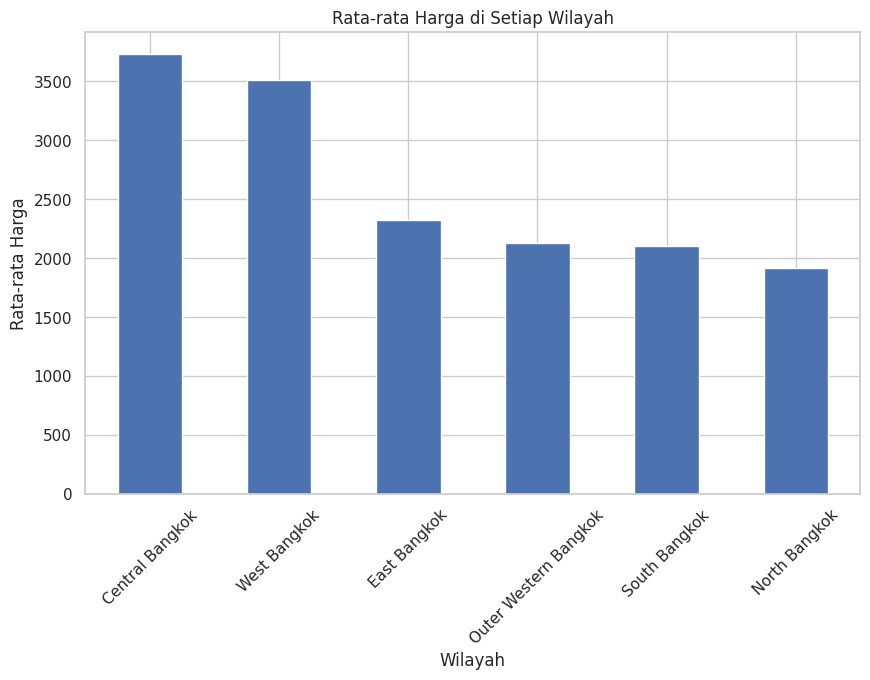

In [324]:
average_price_by_area = df.groupby('area')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_price_by_area.plot(kind='bar')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga di Setiap Wilayah')
plt.xticks(rotation=45)
plt.show()

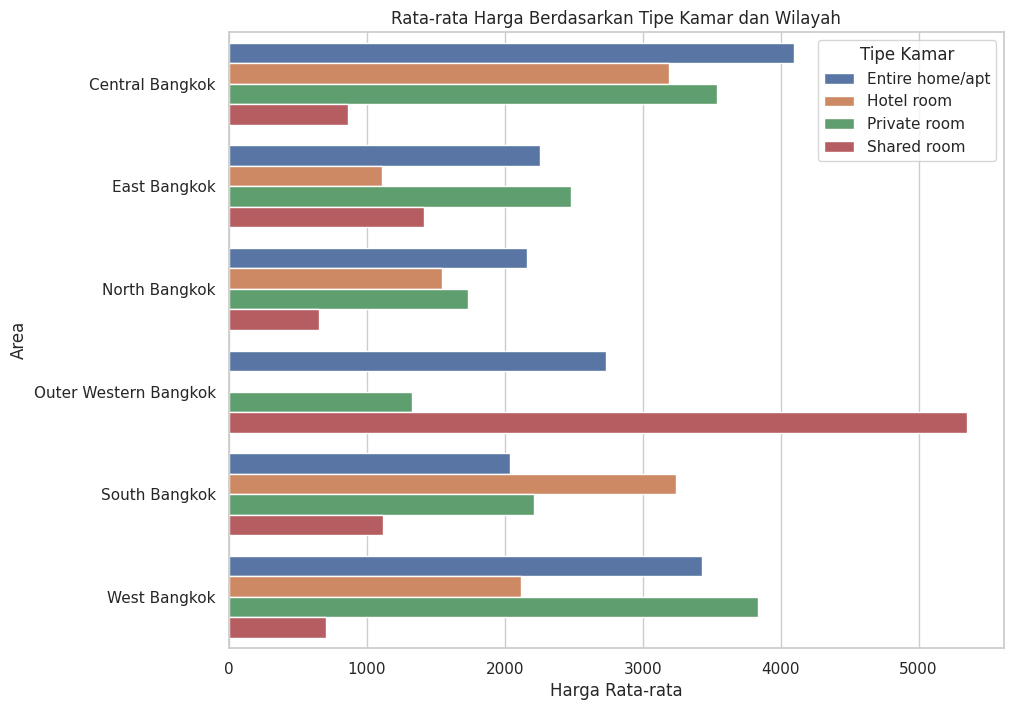

In [325]:
avg_price_by_room_area = df.groupby(['room_type', 'area'])['price'].mean().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_price_by_room_area, y='area', x='price', hue='room_type', orient='h')
plt.ylabel('Area')
plt.xlabel('Harga Rata-rata')
plt.title('Rata-rata Harga Berdasarkan Tipe Kamar dan Wilayah')
plt.legend(title='Tipe Kamar')
plt.show()

### **Analysis on `price` according to its term (Mann-Whitney U Test)**

Analisis harga berdasarkan durasi tinggal membantu host untuk memahami preferensi dan perilaku pasar terkait dengan lama huni tamu. Dengan mengetahui bagaimana harga berbeda antara jangka panjang dan jangka pendek, host dapat menyesuaikan strategi harga mereka sesuai dengan permintaan dan kebutuhan pasar.

Kita akan menggunakan histogram untuk membandingkan *density* dsitribusi price berdasarkan `term`. Di sini kita akan memisahkan antara listing dengan `price`  < 10000 dan listing dengan `price` >= 10000 agar visualisasi tampak lebih jelas.

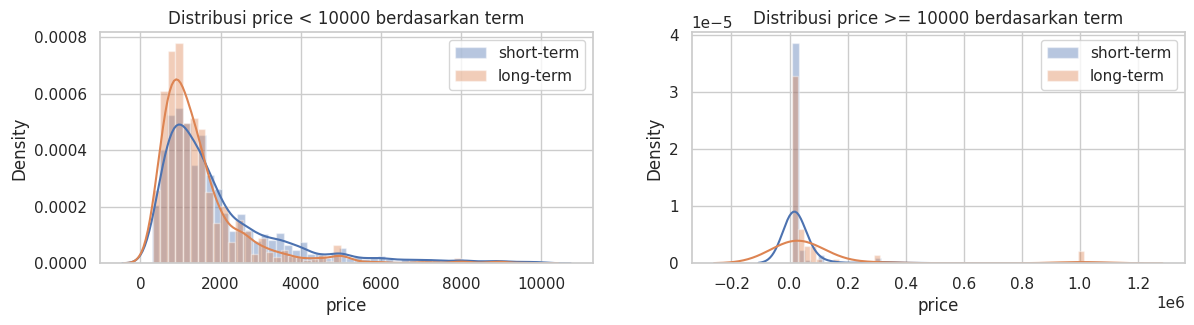

In [326]:
filter_df_10000 = df[df['price'] < 10000]
filter_df_above_10000 = df[df['price'] >= 10000]

filter_df = [filter_df_10000, filter_df_above_10000]
posisi = 1
plt.figure(figsize = (14,3))
for dataframe in filter_df:
  plt.subplot(1,2,posisi)
  sns.distplot(dataframe[dataframe['stay_type']=='Short-Term']['price'], label='short-term')
  sns.distplot(dataframe[dataframe['stay_type']=='Long-Term']['price'], label='long-term')
  if posisi == 1:
    plt.title('Distribusi price < 10000 berdasarkan term')
  else:
    plt.title('Distribusi price >= 10000 berdasarkan term')
  plt.legend()
  posisi += 1
plt.show()

Dari grafik di atas (`price` < 10000), kita lihat bahwa antara long-term dan short-term memiliki bentuk distribusi yang mirip. Modus price berada di kisaran 1000 THB. Kemudian untuk (`price` >= 10000), distribusi `price` untuk long-term lebih melebar, namun memiliki modus yang sama dengan short-term, yakni di angka 10000 THB.

Karena `price` tidak berdistribusi normal, selanjutnya kita akan melakukan analisis dengan one-tailed Mann-Whitney U test untuk menguji apakah ada perbedaan signifikan antara tarif sewa short-term dan long-term.

Hipotesis:

H0: median1 = median2

H1: median1 > median2

Tingkat signifikansi (alpha) = 0.05

In [327]:
from scipy.stats import mannwhitneyu
t_score, pval = mannwhitneyu(df[df['stay_type']=='Short-Term']['price'],(df[df['stay_type']=='Medium-Term']['price'] & df[df['stay_type']=='Long-Term']['price']), alternative='greater')
print('p-value =', pval/2)
if pval/2 < 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print('Terdapat cukup bukti untuk menyatakan bahwa listing dengan penyewaan short-term memiliki tarif sewa per hari yang lebih tinggi dibandingkan listing dengan sistem penyewaan long-term')

else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada cukup bukti untuk menyatakan bahwa listing dengan penyewaan short-term memiliki tarif sewa per hari yang lebih tinggi dibandingkan listing dengan sistem penyewaan long-term')

p-value = 0.0
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa listing dengan penyewaan short-term memiliki tarif sewa per hari yang lebih tinggi dibandingkan listing dengan sistem penyewaan long-term


Dari hasil tersebut, kita simpulkan bahwa `term` dari listing memengaruhi variabel `price`.

Untuk melihat perbedaannya dengan lebih jelas, kita akan memvisualisasikannya dengan bar plot.

In [328]:
median_price_term = df.groupby('stay_type')['price'].median().reset_index().sort_values(by = 'price', ascending=False)

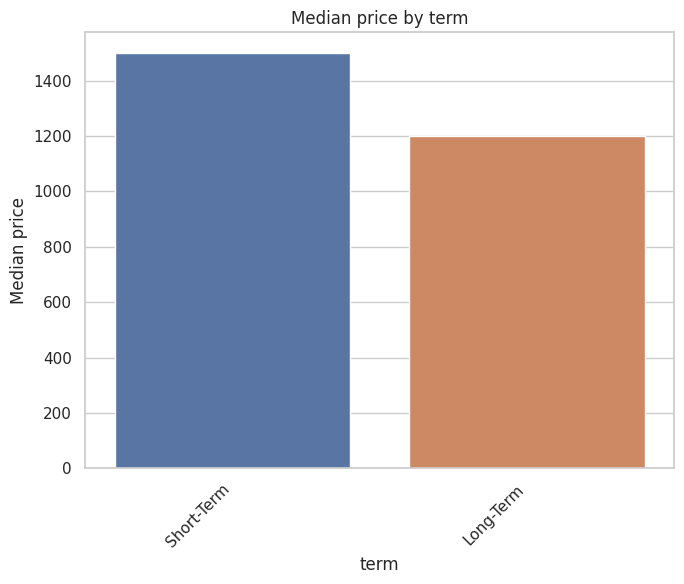

In [329]:
plt.figure(figsize = (7,6))
ax = sns.barplot(data=median_price_term, x='stay_type', y='price', hue = 'stay_type')
plt.title('Median price by term')
plt.xlabel('term')
plt.ylabel('Median price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Informasi di atas yang diperoleh dari uji Mann-Whitney tersebut memungkinkan host untuk menyesuaikan strategi harga mereka secara lebih efektif. Mereka dapat menetapkan harga yang lebih kompetitif untuk jangka panjang untuk menarik tamu yang mencari akomodasi jangka panjang, sementara untuk jangka pendek, mereka dapat menetapkan harga yang lebih tinggi untuk memaksimalkan pendapatan per hari.

### **Analysis on `price` according to its `popularity` (Mann-Whitney U test)**
Tarif listing merupakan faktor penting yang mempengaruhi profitabilitas host Airbnb dan pihak Airbnb. Dengan mengetahui apakah ada perbedaan signifikan dalam tarif antara kamar yang populer dan tidak populer, host dapat menyesuaikan strategi harga mereka untuk meningkatkan profitabilitas.

In [330]:
popularity_count = df['popularity'].value_counts().reset_index()
popularity_count.columns = ['popularity', 'count']
fig = px.pie(popularity_count, names='popularity', values='count', title='Popularity Distribution')
fig.show()

Mayoritas listing pada dataset ini dikategorikan sebagai 'unpopular'.

Karena `price` memiliki distribusi yang tidak normal, maka kita akan menggunakan Mann-Whitney U test untuk menguji apakah ada perbedaan signifikan antara tarif listing populer dan tidak populer.

Hipotesis:
H0: median1 = median2
H1: median1 > median2
Tingkat signifikansi (alpha) = 0.05

In [331]:
from scipy.stats import mannwhitneyu
t_score, pval = mannwhitneyu(df[df['popularity']=='popular']['price'],df[df['popularity']=='unpopular']['price'], alternative='greater')
print('p-value =', pval)
if pval/2 < 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print("Terdapat perbedaan signifikan antara median tarif kamar per hari listing popular dan median tarif kamar per hari listing unpopular")

else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print("Tidak terdapat perbedaan signifikan antara median tarif kamar per hari listing popular dan median tarif kamar per hari listing unpopular")

p-value = 1.4004191235711575e-22
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat perbedaan signifikan antara median tarif kamar per hari listing popular dan median tarif kamar per hari listing unpopular


Berdasarkan hasil Mann-Whitney U test, dapat disimpulkan bahwa median tarif listing populer secara signifikan lebih tinggi dibandingkan dengan listing yang tidak populer. Temuan ini menunjukkan bahwa penyewa Airbnb di Bangkok, terutama turis, memprioritaskan kenyamanan dan bersedia memilih daftar dengan harga yang relatif lebih tinggi untuk pengalaman yang lebih nyaman dan memuaskan. Hasil uji Mann-Whitney U dapat memberikan petunjuk kepada host bahwa ada peluang untuk menyesuaikan harga listing mereka. Host dapat mempertimbangkan untuk menaikkan harga pada listing mereka yang populer untuk mencerminkan permintaan yang tinggi dari para pelanggan.

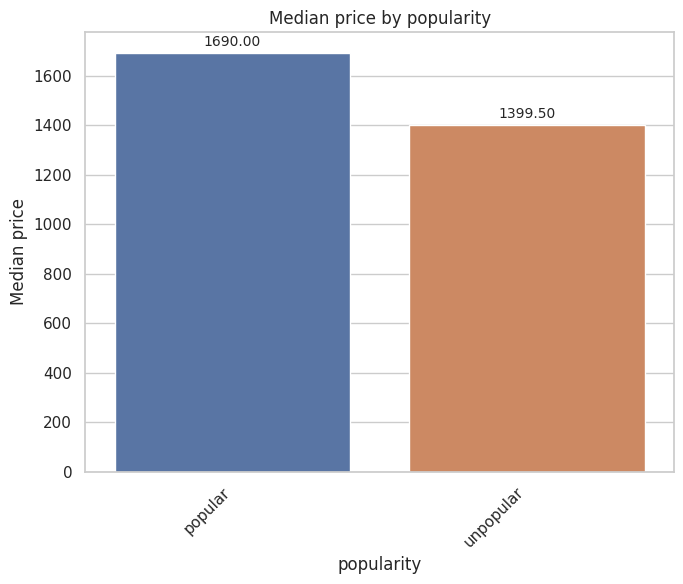

In [332]:
median_price_popular = df.groupby('popularity')['price'].median().reset_index().sort_values(by = 'price', ascending=False)
plt.figure(figsize = (7,6))
ax = sns.barplot(data=median_price_popular.head(15), x='popularity', y='price', hue = 'popularity')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.2f', padding=3)
plt.title('Median price by popularity')
plt.xlabel('popularity')
plt.ylabel('Median price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Dari bar plot tersebut, kita dapat melihat bahwa terdapat perbedaan 290 THB antara kedua median tersebut. Perbedaan tersebut tergolong signifikan.

## **`popularity` analysis**
Karena variabel `popularity` bersifat kategorik, kita akan menggunakan proportion Z test dan Chi-squared test untuk menguji hipotesis kita.

### **Analysis on `popularity` according to its `room_type` (Chi-squared Test)**
Dengan analisis ini kita akan mengetahui apakah 'room_type' memengaruhi `popularity` sebuah listing. Analisis ini dapat memberikan wawasan yang berharga bagi host Airbnb untuk memahami preferensi tamu dan mengoptimalkan strategi pemasaran mereka.

In [333]:
fig=px.sunburst(df,path=['popularity','room_type'],color='popularity', title=f'Proporsi popularity Berdasarkan room_type')
fig.show()

Dari sunburst chart tersebut, kita ketahui bahwa 'Entire home/apt' dan 'Private room' mendominasi kategori listing populer. Namun, karena jumlah listing populer jauh lebih kecil, kita akan menggunakan uji statistik untuk mendalaminya lebih lanjut dengan uji Chi-squared.

H0: Proporsi antara 'Entire home/apt', 'Private room', 'Hotel room', dan 'Shared room' dengan label 'popular' sama besar (tidak ada hubungan antara `room_type` dengan `popularity)

H1: Setidaknya ada satu pasang proporsi yang berbeda (ada hubungan antara `room_type` dengan `popularity)

Tingkat signifikansi (alpha) = 0.05

In [334]:
cross_tab = pd.crosstab(df['room_type'], df['popularity'])
cross_tab

popularity,popular,unpopular
room_type,,
Entire home/apt,1179,7722
Hotel room,31,617
Private room,257,5511
Shared room,4,518


In [335]:
p_val = chi2_contingency(cross_tab)[1]
print('p-value =', p_val)
if pval > 0.05:
  print('Gagal tolak H0')
  print('Tidak ada hubungan antara kedua variabel')
else:
  print('Tolak H0')
  print('Tipe kamar memengaruhi popularitas')

p-value = 2.4217397070903786e-83
Tolak H0
Tipe kamar memengaruhi popularitas


In [336]:
len(df[df['popularity'] == 'popular'])

1471

Dari uji Chi-squared, disimpulkan bahwa ada perbedaan signifikan antara proporsi ke-4 `room_type` berdasarkan popularitas. Berarti, dapat kita simpulkan bahwa `room_type` memengaruhi `popularity.

Untuk dapat mengetahui pasangan mana yang berbeda, kita harus melakukan post-hoc test. Namun, demi kepentingan analisis ini, kita hanya cukup mengetahui apakah kedua variabel tersebut saling independen atau dependen.

### **Analysis on `popularity` based on its `stay_type` (Proportion Z-test)**
Dengan memahami popularitas berdasarkan durasi tinggal, host Airbnb dapat lebih memahami preferensi tamu untuk tinggal jangka panjang atau jangka pendek. Informasi ini dapat membantu mereka menyesuaikan penawaran dan strategi pemasaran untuk menarik lebih banyak tamu dan meningkatkan okupansi.

Untuk mendapatkan gambaran mengenai proporsi masing-masing term berdasarkan dekomposisi popularitasnya, kita akan menggunakan sunburst chart.

In [337]:
fig=px.sunburst(df,path=['popularity','stay_type'],color='stay_type', title=f'Proporsi popularity Berdasarkan Stay Type Term')
fig.show()

Dari plot di atas, kita dapat ketahui bahwa listing populer mayoritas merupakan short-term stay. Namun, karena terdapat ketidaksimbangan kelas antara short-term dan long-term stay, kita harus mengujinya secara lebih lanjut. Hipotesis saya, karena Bangkok merupakan kota wisata, listing yang lebih populer adalah listing short-term. Hal ini sejalan dengan data yang diperoleh dari statista.com. Menurut publikasi tersebut, turis mancanegara rata-rata singgah di sebuah hotel selama 9-18 hari (masuk ke kategori short-term stay, kurang dari 28 hari. [(source)](https://www.statista.com/statistics/1154981/thailand-length-of-stay-of-hotel-guests-by-region-of-origin/)

Di sini kita akan menggunakan proportion Z-test two independent sample.
* Pertama kita akan menguji apakah proporsi untuk long-term dan popular listing sama dengan proporsi short-term dan popular listing.
* Kedua kita akan menguji apakah proporsi untuk short-term dan unpopular listing sama dengan proporsi long-term dan unpopular listing.

#### long-term popular vs short-term popular

H0: Tidak ada perbedaan signifikan antara proporsi long-term popular listing dan short-term popular listing

H1: Terdapat perbedaan signifikan antara proporsi long-term popular listing dan short-term popular listing

Tingkat signifikansi (alpha) = 0.05

In [338]:
long_pop = len(df[(df['stay_type']=='Long-Term') & (df['popularity']=='popular')])
total_long = len(df[df['stay_type']=='Long-Term'])
p_long_pop = long_pop/total_long
print('Proporsi long-term dan popular = ',p_long_pop)

Proporsi long-term dan popular =  0.028139289482940557


In [339]:
short_pop = len(df[(df['stay_type']=='Short-Term') & (df['popularity']=='popular')])
total_short = len(df[df['stay_type']=='Short-Term'])
p_medium_pop = short_pop/total_short
print('Proporsi short-term dan popular = ', p_short_pop)

Proporsi short-term dan popular =  0.11085393072662644


In [340]:
zscore, pval = proportions_ztest(
                [p_long_pop,p_short_pop], # proporsi nya
                [total_long, total_short]) # total
print('p-value =',pval)
if pval > 0.05:
  print('Gagal tolak H0')
  print('Tidak ada perbedaan signifikan antara proporsi long-term popular dan short-term popular listing')
else:
  print('Tolak H0')
  print('Terdapat perbedaan signifikan antara proporsi short-term popular dan long-term popular listing')

p-value = 0.982206751370248
Gagal tolak H0
Tidak ada perbedaan signifikan antara proporsi long-term popular dan short-term popular listing


In [341]:
print('Jumlah listing yang popular =', total_long)

Jumlah listing yang popular = 2843


Dari uji proportion Z-test two independent sample, disimpulkan bahwa tidak ada perbedaan signifikan antara proporsi long-term popular listing dan short-term popular listing. Meskipun proporsi long-term dan popular dari data tersebut adalah 2.814% sedangkan short-term dan popular adalah 10.6975%, kita tetap gagal menolak H0. Hal ini disebabkan oleh jumlah listing popular yang sangat sedikit, yaitu 2843 dari 15801 jumlah data. Akibatnya, perbedaan dalam proporsi mungkin tidak cukup besar untuk dapat terdeteksi sebagai perbedaan yang signifikan secara statistik.

#### long-term unpopular vs short-term unpopular

H0: Tidak ada perbedaan signifikan antara proporsi long-term unpopular listing dan short-term unpopular listing

H1: Terdapat perbedaan signifikan antara proporsi long-term unpopular listing dan short-term unpopular listing

Tingkat signifikansi (alpha) = 0.05

In [342]:
long_unpop = len(df[(df['stay_type']=='Long-Term') & (df['popularity']=='unpopular')])
total_long = len(df[df['stay_type']=='Long-Term'])
p_long_unpop = long_unpop/total_long
print('Proporsi long-term dan unpopular = ',p_long_unpop)

Proporsi long-term dan unpopular =  0.9718607105170595


In [343]:
short_unpop = len(df[(df['stay_type']=='Short-Term') & (df['popularity']=='unpopular')])
total_short = len(df[df['stay_type']=='Short-Term'])
p_short_unpop = short_unpop/total_short
print('Proporsi short-term dan unpopular = ', p_short_unpop)

Proporsi short-term dan unpopular =  0.8929670667897814


In [344]:
zscore, pval = proportions_ztest(
                [p_long_unpop,p_short_unpop], # proporsi nya
                [total_long, total_short], alternative='larger') # total
print('p-value =',pval/2)
if pval/2 > 0.05:
  print('Gagal tolak H0')
  print('Tidak ada perbedaan signifikan antara proporsi long-term unpopular listing dan short-term unpopular listing')
else:
  print('Tolak H0')
  print('Terdapat perbedaan signifikan antara proporsi long-term unpopular listing dan short-term unpopular listing')

p-value = 0.05601243785060431
Gagal tolak H0
Tidak ada perbedaan signifikan antara proporsi long-term unpopular listing dan short-term unpopular listing


Dari uji proportion Z-test two independent sample, disimpulkan bahwa tidak ada perbedaan signifikan antara proporsi long-term unpopular listing dan short-term unpopular listing. Berarti, `term` tidak memengaruhi `popularity` dari sebuah listing.

Meskipun demikian, kesimpulan ini menyoroti pentingnya pengelolaan kualitas dan layanan dalam meningkatkan popularitas listing. Hal ini menekankan bahwa host Airbnb harus terus berupaya untuk menyediakan pengalaman yang baik kepada tamu mereka, terlepas dari durasi tinggal.

### **Analysis on `popularity` based on `calculated_host_listings_count` (Mann-Whitney U Test)**
Pada heatmap, kita melihat adanya korelasi lemah antara `calculated_host_listings_count` dengan `number_of_reviews` dan `reviews_per_month`. Sekarang kita akan membuktikan apakah listing populer cenderung dimiliki oleh host dengan listing yang banyak.

H0: Terdapat cukup bukti untuk menyatakan bahwa listing popular cenderung dimiliki oleh host dengan listing yang lebih banyak

H1: Tidak ada cukup bukti untuk menyatakan bahwa listing popular cenderung dimiliki oleh host dengan listing yang lebih banyak

Tingkat signifikansi (alpha) = 0.05

In [345]:
from scipy.stats import mannwhitneyu
t_score, pval = mannwhitneyu(df[df['popularity']=='popular']['calculated_host_listings_count'],df[df['popularity']=='unpopular']['calculated_host_listings_count'], alternative='greater')
print('p-value =', pval/2)
if pval/2 < 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print('Terdapat cukup bukti untuk menyatakan bahwa listing popular cenderung dimiliki oleh host dengan listing yang lebih banyak')

else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada cukup bukti untuk menyatakan bahwa listing popular cenderung dimiliki oleh host dengan listing yang lebih banyak')

p-value = 4.7279990890486476e-98
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat cukup bukti untuk menyatakan bahwa listing popular cenderung dimiliki oleh host dengan listing yang lebih banyak


Untuk melihat perbedaannya dengan lebih jelas, mari kita visualisasikan.

In [346]:
median_popularity_list_count = df.groupby('popularity')['calculated_host_listings_count'].median().reset_index().sort_values(by = 'calculated_host_listings_count', ascending=False)

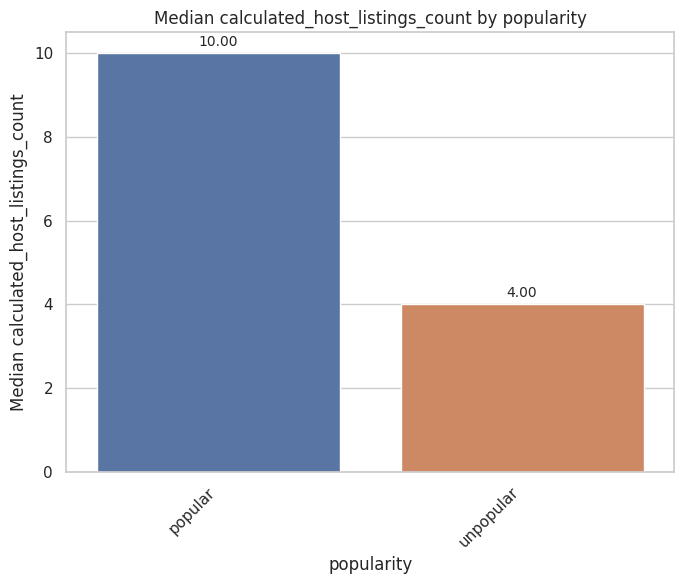

In [347]:
plt.figure(figsize = (7,6))
ax = sns.barplot(data=median_popularity_list_count, x='popularity', y='calculated_host_listings_count', hue = 'popularity')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.2f', padding=3)
plt.title('Median calculated_host_listings_count by popularity')
plt.xlabel('popularity')
plt.ylabel('Median calculated_host_listings_count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Dari hasil uji Mann-Whitney, kita dapat simpulkan bahwa listing populer cenderung dimiliki oleh host dengan listing yang banyak. Hal ini mungkin menunjukkan bahwa host yang memiliki banyak listing memiliki kesempatan lebih besar untuk bereksperimen dengan harga, fasilitas, dan strategi pemasaran yang berbeda. Pengalaman ini memungkinkan mereka untuk mengoptimalkan listing berdasarkan feedback dan data kinerja, yang pada akhirnya meningkatkan popularitas dan kepuasan tamu.

#### **Analysis on `popularity` and `number_of_reviews` based on listings' `language` (Mann-Whitney U Test)**

Selanjutnya kita akan menganalisis apakah listing dengan bahasa Inggris lebih populer dibandingkan listing berbahasa lainnya. Host dapat menarik audiens yang lebih luas dengan menyesuaikan bahasa listing mereka berdasarkan preferensi pelancong di platform Airbnb, khususnya jika terbukti bahwa listing dengan judul dalam bahasa tertentu lebih populer atau menerima lebih banyak ulasan.

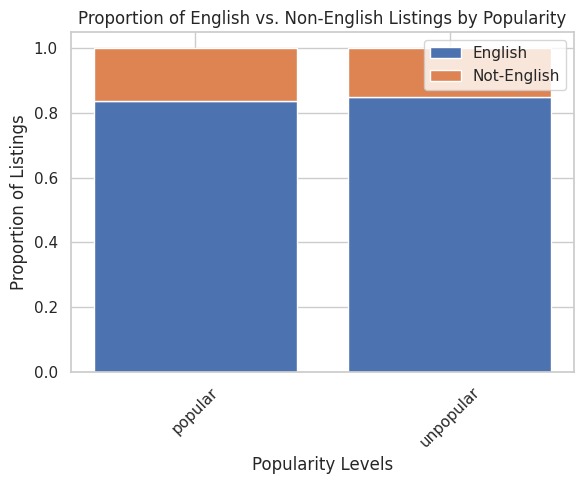

In [348]:
language_popularity = pd.crosstab(df['popularity'], df['language'], normalize='index').sort_index()

plt.figure(figsize=(6, 5))


plt.bar(np.arange(len(language_popularity.index)), language_popularity['English'], label='English')

plt.bar(np.arange(len(language_popularity.index)), language_popularity['Not English'], bottom=language_popularity['English'], label='Not-English')

plt.xlabel('Popularity Levels')
plt.ylabel('Proportion of Listings')
plt.legend()
plt.xticks(np.arange(len(language_popularity.index)), language_popularity.index, rotation=45)
plt.title('Proportion of English vs. Non-English Listings by Popularity')
plt.tight_layout()
plt.show()

Dari bar plot tersebut, kita lihat bahwa mayoritas judul listing sudah berbahasa Inggris.

Sekarang kita akan menganalisis `number_of_reviews_ltm` yang diperoleh oleh listing berbahasa Inggris dan listing berbahasa lain. Kita akan menggunakan Mann-Whitney U Test untuk melihat apakah ada perbedaan di antara keduanya.

Hipotesis:

H0: Tidak ada perbedaan signifikan jumlah review yang didapat antara listing berbahasa Inggris dan yang tidak

H1: Jumlah review yang didapat oleh listing berbahasa Inggris lebih besar daripada jumlah review yang didapat oleh listing berbahasa lain

In [349]:
t_score, pval = mannwhitneyu(df[df['language']=='English']['number_of_reviews'],df[df['language']=='Not English']['number_of_reviews'], alternative='greater')
print('p-value =', pval/2)
if pval/2 < 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print('Terdapat perbedaan signifikan antara jumlah review yang didapat antara listing berbahasa Inggris dan yang tidak')
else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Jumlah review yang didapat oleh listing berbahasa Inggris lebih besar daripada jumlah review yang didapat oleh listing berbahasa lain')

p-value = 8.676393092955429e-07
Tolak H0
Ada cukup bukti untuk menolak H0
Terdapat perbedaan signifikan antara jumlah review yang didapat antara listing berbahasa Inggris dan yang tidak


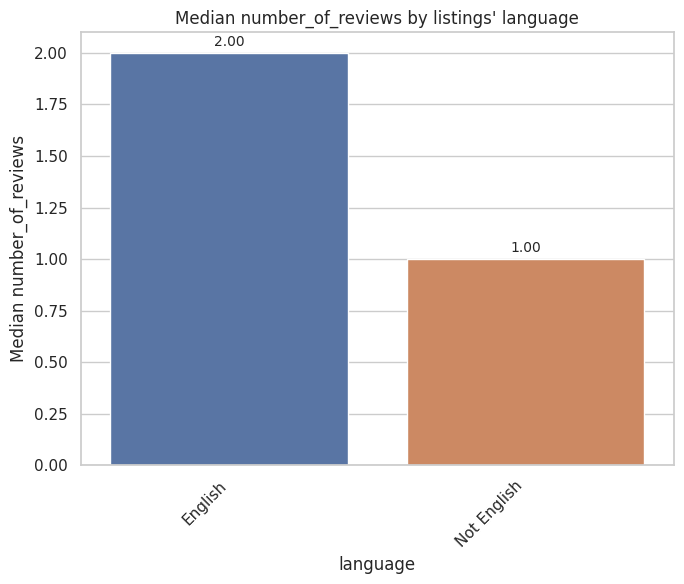

In [350]:
median_price_language = df.groupby('language')['number_of_reviews'].median().reset_index().sort_values(by = 'number_of_reviews', ascending=False)
plt.figure(figsize = (7,6))
ax = sns.barplot(data=median_price_language.head(15), x='language', y='number_of_reviews', hue = 'language')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.2f', padding=3)
plt.title('Median number_of_reviews by listings\' language')
plt.xlabel('language')
plt.ylabel('Median number_of_reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Listing dengan berbahasa Inggris memiliki median number_of_reviews = 2, sedangkan listing berbahasa lain memiliki median number_of_reviews = 1. Pelancong internasional mungkin cenderung memilih listing berbahasa Inggris karena kemudahan dalam komunikasi dan pemahaman informasi tentang listing tersebut. Bahasa Inggris sebagai lingua franca global memudahkan banyak pelancong yang mungkin tidak fasih berbahasa Thailand atau bahasa lokal lainnya di Bangkok.

#### **Analysis on `price` based on listings' `language` (Mann-Whitney U Test)**

Analisis ini dapat mengidentifikasi apakah listing berbahasa Inggris cenderung memiliki tarif yang lebih tinggi dan permintaan yang kuat. Dengan informasi ini, host bisa lebih tepat dalam menargetkan segmen pasar yang bersedia membayar lebih untuk kenyamanan berkomunikasi dalam bahasa Inggris.

Kita akan menggunakan histogram untuk membandingkan *density* dsitribusi price berdasarkan bahasa dari judul listingnya. Di sini kita akan memisahkan antara listing dengan `price`  < 10000 dan listing dengan `price` >= 10000 agar visualisasi tampak lebih jelas.


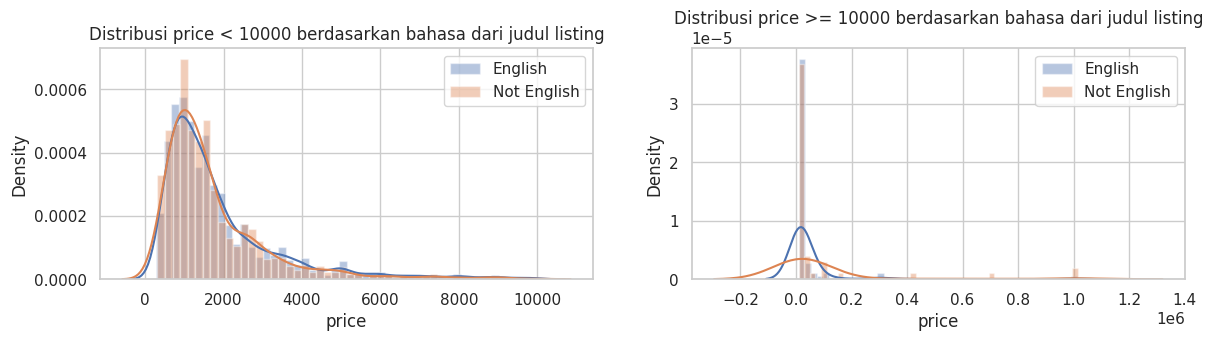

In [351]:
filter_df_10000 = df[df['price'] < 10000]
filter_df_above_10000 = df[df['price'] >= 10000]

filter_df = [filter_df_10000, filter_df_above_10000]
posisi = 1
plt.figure(figsize = (14,3))
for dataframe in filter_df:
  plt.subplot(1,2,posisi)
  sns.distplot(dataframe[dataframe['language']=='English']['price'], label='English')
  sns.distplot(dataframe[dataframe['language']=='Not English']['price'], label='Not English')
  if posisi == 1:
    plt.title('Distribusi price < 10000 berdasarkan bahasa dari judul listing')
  else:
    plt.title('Distribusi price >= 10000 berdasarkan bahasa dari judul listing')
  plt.legend()
  posisi += 1
plt.show()

Dari grafik di atas (`price` < 10000), kita lihat bahwa antara judul berbahasa Inggris dan yang tidak berbahasa Inggris memiliki bentuk distribusi yang mirip. Modus price berada di kisaran 1000 THB. Kemudian untuk (`price` >= 10000), distribusi `price` untuk judul yang tidak berbahasa Inggris lebih melebar, namun memiliki modus yang sama dengan yang berbahasa Inggris, yakni di angka 10000 THB.

Sekarang kita akan melakukan Mann-Whitney U Test untuk melihat apakah perbedaan signifikan antara tarif harian listing berbahasa Inggris dan yang tidak.

Hipotesis:

H0: Tidak ada perbedaan signifikan antara tarif harian antara listing berbahasa Inggris dan yang berbahasa lain

H1: Tarif harian listing berbahasa Inggris lebih besar daripada tarif harian listing berbahasa lain

In [352]:
t_score, pval = mannwhitneyu(df[df['language']=='English']['price'],df[df['language']=='Not English']['price'], alternative='greater')
print('p-value =', pval/2)
if pval/2 < 0.05:
  print("Tolak H0")
  print("Ada cukup bukti untuk menolak H0")
  print('Tarif harian listing berbahasa Inggris lebih besar daripada tarif harian listing berbahasa lain')
else:
  print("Gagal tolak H0")
  print("Tidak ada cukup bukti untuk menolak H0")
  print('Tidak ada perbedaan signifikan antara tarif harian antara listing berbahasa Inggris dan yang berbahasa lain')

p-value = 2.667492972698489e-05
Tolak H0
Ada cukup bukti untuk menolak H0
Tarif harian listing berbahasa Inggris lebih besar daripada tarif harian listing berbahasa lain


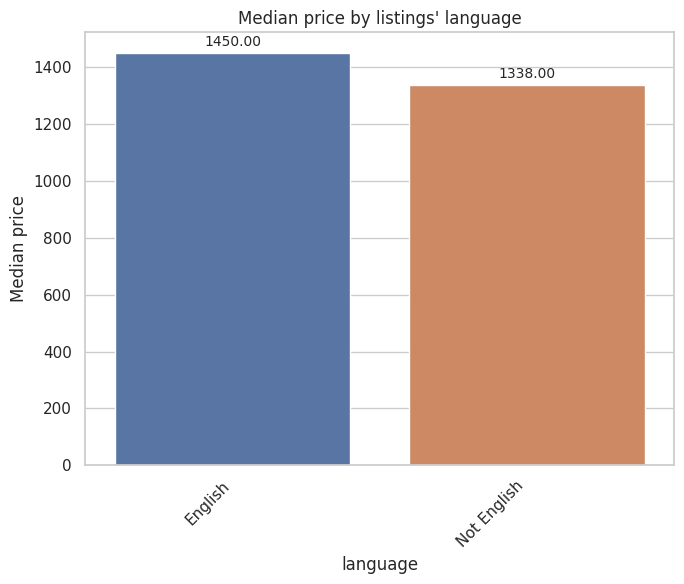

In [353]:
median_price_language = df.groupby('language')['price'].median().reset_index().sort_values(by = 'price', ascending=False)
plt.figure(figsize = (7,6))
ax = sns.barplot(data=median_price_language.head(15), x='language', y='price', hue = 'language')
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.2f', padding=3)
plt.title('Median price by listings\' language')
plt.xlabel('language')
plt.ylabel('Median price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Median tarif harian listing berbahasa Inggris adalah 1450 THB sedangkan median tarif harian listing berbahasa lain adalah 1338 THB.

Dari perspektif bisnis, ini berarti bahwa listing berbahasa Inggris cenderung menetapkan harga yang lebih tinggi, yang mungkin mencerminkan nilai tambah yang diberikan oleh listing tersebut, seperti aksesibilitas yang lebih besar untuk pasar internasional yang lebih luas, asumsi tentang standar atau kualitas yang lebih tinggi, atau kemungkinan permintaan yang lebih tinggi.

Host di Airbnb mungkin mempertimbangkan informasi ini untuk menyusun strategi harga mereka, dan Airbnb bisa menggunakan data ini untuk menyediakan wawasan bagi host untuk menetapkan harga yang kompetitif serta untuk meningkatkan listing mereka sehingga menarik bagi pasar yang lebih global.

## Kesimpulan dan Rekomendasi

Setelah melakukan analisa di atas, maka bisa ditarik beberapa kesimpulan dan juga rekomendasi yang bisa dilakukan oleh untuk melakukan evaluasi dan juga meningkatkan kualitas penginapan Airbnb di Bangkok.

### Kesimpulan

**1. General**:
- Dari 15,846 data yang kita miliki, hanya 1471 listing yang tergolong listing populer
- Terdapat 4 tipe kamar yang ditawarkan ('Entire home/apt', 'Private room', 'Hotel room', dan 'Shared room'). Tipe kamar yang paling banyak ditawarkan adalah 'Entire home/apt', dan 'Private room'.
- Listing populer didominasi oleh 'Entire home/apt' dan 'Private room'


**2. Apakah persebaran penginapan sudah cukup merata di Bangkok?**

- 'Entire Home/Apartment' merupakan tipe kamar penginapan Airbnb yang paling banyak terdapat di Bangkok, dengan total sebanyak 8912 kamar (56.22%). Lalu kemudian disusul oleh 'Private Room' sebanyak 5770 kamar (36.4%).
- Terdapat perbedaan jumlah yang cukup signifikan antara dua tipe kamar teratas dengan 'Hotel Room' dan 'Shared Room' yang masing-masing hanya memiliki jumlah kamar sebanyak 523 kamar (4.09%) dan 648 kamar (3.30%) saja.
- Sesuai dengan jumlah terbanyaknya, tipe kamar 'Entire Home/Apartment' juga merupakan tipe kamar yang paling banyak disewa oleh tamu/turis, dengan total review sebanyak 197943 buah. Berdasarkan hal tersebut juga dapat disimpulkan bahwa para tamu yang berkunjung ke Bangkok lebih nyaman untuk menginap pada sebuah area yang luas dan privat dibanding area yang terbatas dan komunal.
- Secara berurutan, Vadhana, Khlong Toei, Huai Khwang, Ratchatdewi, dan Bang Rak merupakan lima lokasi dengan jumlah listings penginapan Airbnb terbanyak di Bangkok.
- Vadhana dan Khlong Toei memiliki jumlah listings terbanyak karena memang dekat dengan berbagai pusat keramaian dan juga objek wisata di Bangkok.
- Tipe 'Entire Home/Apartment' juga mendominasi pada kelima lokasi dengan jumlah listings penginapan Airbnb terbanyak.
- Tipe 'Shared Room' merupakan tipe kamar yang paling sedikit dimiliki oleh setiap lokasi.
- Khlong Toei, Vadhana, Sathon, Ratchatdewi, dan Huai Khwang menjadi lima lokasi favorit yang dikunjungi oleh para tamu/turis di Bangkok.
- Khlong Toei menjadi lokasi yang disukai oleh para tamu/turis sebagai lokasi akomodasinya dengan total 41281 pengunjung yang tercatat. Menjadikannya sebagai lokasi paling strategis untuk melakukan mobilisasi.
- Penginapan Airbnb yang tersebar di Bangkok secara mayoritas dimiliki oleh host bernama Curry, dengan total listings sebanyak 228 kamar. Kepemilikan yang mendominasi tersebut bisa dilihat sebagai sebuah monopoli yang sedikit-banyaknya akan berdampak pada para host lain yang tidak memiliki jumlah kamar ataupun *exposure* sebanyak dirinya. Karena jumlah tersebut membuat penginapan yang dimiliki oleh Curry semakin mudah ditemukan oleh tamu/turis.

**3. Analisa Berdasarkan Wilayah**
- Wilayah Central Bangkok memiliki jumlah listing yang tinggi dibandingkan dengan wilayah lain. Hal ini dapat disebabkan oleh keberadaan pusat bisnis, pusat perbelanjaan, perkantoran, dan akses transportasi yang mudah di wilayah tersebut. Sehingga banyak wisatawan yang berminat untuk menyewa di wilayah Central Bangkok
- Wilayah South Bangkok memiliki jumlah listing yang signifikan karena wilayah tersebut sebagai distrik hiburan dan wisatawan cenderung banyak ke wilayah ini
- Wilayah East, West, North dan Outer Western Bangkok mempunyai distribusi jenis listing yang berbeda beda dari yang terjangkau sampai yang paling mahal sekalipun
- Berdasarkan jenis kamar, dapat disimpulkan bahwa "Entire home/apt" (Seluruh Rumah/Apartemen) menjadi pilihan yang populer bagi tamu yang mencari privasi dan kenyamanan seperti tinggal di rumah sendiri. dan Private room (Kamar Pribadi) juga menjadi pilihan yang banyak diminati, terutama bagi tamu yang menginginkan privasi tetapi tidak memerlukan ruang yang banyak.
- Harga rata-rata di setiap wilayah Bangkok bervariasi tergantung pada jenis kamar dan lokasinya. Wisatawan dapat memilih wilayah yang sesuai dengan preferensi mereka dan menyesuaikan anggaran akomodasi mereka dengan mempertimbangkan harga rata-rata di setiap wilayah dan jenis kamar yang mereka inginkan

**`4. price`**
- Listing yang tergolong populer memiliki median tarif harian yang lebih besar daripada listing yang tidak populer.
- Tipe kamar 'Hotel room', 'Entire home/apt', dan 'Private room' merupakan tipe kamar dengan median tarif harian tertinggi, yaitu 1700 THB, 1536 THB, 1212 THB.
- Distrik yang berada di tengah kota memiliki median tarif harian yang lebih tinggi.
- Nong Chok, Pathum Wan, dan Vadhana merupakan distrik dengan median tarif harian tertinggi. Sedangkan distrik dengan median tarif terendah adalah distrik yang berada di pinggir kota seperti Nong Khaem, Wang Thong Lang, dan Don Mueang.
- Median tarif harian listing yang disewakan secara 'short-term' lebih besar dibandingkan listing yang disewakan secara 'long-term'
- Listing yang berjudul bahasa Inggris memiliki median tarif yang lebih tinggi daripada listing yang berjudul bahasa lain.

**`5. popularity`**
- Tipe kamar memengaruhi popularitas sebuah listing
- Durasi menginap tidak memengaruhi popularitas sebuah listing.
- Listing populer cenderung dimiliki oleh host yang mempunyai listing yang banyak.
- Bahasa dari judul listing memengaruhi popularitas sebuah listing. Selain itu, listing berbahasa Inggris juga memiliki jumlah review yang lebih banyak dibandingkan listing berbahasa lainnya.

**Other analysis**
1. Tiap distrik didominasi oleh listing bertipe 'Entire home/apt' atau 'Private room'

Dari hasil analisis tersebut, kita akan menjawab pertanyaan di bagian Problem Statement:
1. Bagaimana karakteristik sebuah listing memengaruhi tarif harian yang ditetapkan oleh host? Apa saja faktor yang memengaruhi tarif harian listing?
  * Lokasi listing merupakan faktor utama yang menentukan tarif harian. Listing yang terletak di pusat kota atau distrik yang terkenal dengan kegiatan malam dan akses ke atraksi lokal memiliki tarif yang lebih tinggi. Ini menunjukkan bahwa aksesibilitas dan kedekatan dengan pusat hiburan, restoran, dan fasilitas transportasi merupakan aspek yang bersedia dibayar lebih oleh pelanggan.
  * Listing yang disewakan untuk jangka waktu 'short-term' cenderung memiliki tarif harian yang lebih tinggi dibandingkan dengan 'long-term', ini mungkin karena kenyamanan dan fleksibilitas yang lebih besar untuk tamu yang menginap dalam jangka pendek.
  * Listing dengan judul yang berbahasa Inggris cenderung ditawarkan dengan harga yang lebih tinggi. Hal tersebut mencerminkan strategi penargetan pasar yang lebih luas oleh host. Ini bisa menunjukkan bahwa dengan menggunakan judul berbahasa Inggris, host mengantisipasi atau berusaha menarik tamu internasional, yang mungkin memiliki anggaran perjalanan yang lebih besar dan mencari kenyamanan dalam komunikasi.


2.   Bagaimana karakteristik dari listing yang populer?
  *  'Entire home/apt' dan 'Private room' mendominasi daftar listing populer, menegaskan lagi bahwa pelanggan menghargai privasi dan ruang.
  * Listing populer cenderung berada di distrik-distrik pusat kota dan dekat dengan fasilitas penting seperti bandara, yang mendukung teori bahwa tamu lebih menghargai akses yang mudah ke pusat-pusat bisnis, atraksi wisata, pusat perbelanjaan, dan transportasi umum yang baik. Beberapa dari mereka mungkin adalah pelancong bisnis yang mencari kenyamanan dan kemudahan akses ke tempat-tempat penting. Selain itu, mereka juga kemungkinan turis mancanegara yang ingin mengenal budaya Thailand lewat destinasi wisata ternama di Bangkok dan masih awam dengan kota Bangkok sehingga membutuhkan pemahaman yang lebih mendalam tentang lingkungan sekitar dan fasilitas yang tersedia.
  * Listing populer cenderung dimiliki oleh host yang mempunyai banyak listing. Host dengan banyak listing mungkin memiliki lebih banyak pengalaman dan keahlian dalam menyediakan akomodasi berkualitas. Mereka mungkin lebih terbiasa dengan apa yang dicari oleh penyewa dan bagaimana memenuhi atau melebihi ekspektasi tersebut.
  * Listing dengan judul bahasa Inggris lebih populer di kalangan penyewa. Judul berbahasa Inggris mungkin lebih mudah diakses oleh pelancong internasional yang membuat listing tersebut lebih mudah ditemukan dan dipahami, dan oleh karena itu lebih mungkin untuk mendapatkan pemesanan dan ulasan.


3.   Bagaimana bahasa dari judul listing memengaruhi tarif harian listing dan popularitas listing?
  * Listing dengan judul berbahasa Inggris memiliki median tarif harian yang lebih tinggi daripada yang berjudul bahasa lain. Ini menandakan bahwa host yang menggunakan bahasa Inggris mungkin menyasar pasar internasional yang bersedia membayar lebih atau menunjukkan standar dan kualitas yang lebih tinggi, yang dapat membenarkan tarif yang lebih tinggi.
  * Judul listing berbahasa Inggris memiliki korelasi dengan jumlah ulasan yang lebih tinggi, yang dapat diinterpretasikan sebagai indikator popularitas yang lebih besar. Lebih banyak ulasan umumnya berarti lebih banyak tamu telah menginap, yang bisa diakibatkan oleh daya tarik lebih luas dari listing yang berkomunikasi dalam bahasa yang secara luas digunakan oleh pelancong internasional.

### Rekomendasi

Berdasarkan jawaban dari rumusan masalah dan juga kesimpulan yang telah disampaikan, saya merekomendasikan beberapa hal bagi beberapa *stakeholder*:

**Dinas Pariwisata Bangkok**
1. Membuat sebuah regulasi terkait jumlah maksimal penginapan yang bisa dimiliki oleh satu individu, agar distribusi dari tamu/turis yang ingin menginap bisa tersebar secara merata dan menguntungkan masing-masing host.
2. Mengevaluasi lokasi-lokasi yang tidak masuk sebagai daerah kunjungan favorit tamu/turis sambil memperbaiki berbagai fasilitas penunjangnya. Atau bahkan mencoba untuk mencari potensi wisata baru di lokasi-lokasi yang tidak terlalu populer agar kunjungan dari para tamu/turis tidak terfokus pada beberapa lokasi saja.

**Airbnb**
1. Mewajibkan customer untuk melakukan penulisan review setiap selesai menginap, sehingga data yang didapat nantinya akan lebih lengkap dan memudahkan untuk melakukan pengolahan data.
2. Menambahkan kolom penilaian yang wajib diisi oleh para konsumen, sehingga bisa juga dijadikan sebagai bahan evaluasi terkait service yang dilakukan oleh host penginapan, baik bagi sesama konsumen ataupun pihak internal Airbnb.
3. Memperketat aplikasi form pendaftaran host dengan mewajibkan pengisian beberapa informasi penting untuk menghindari *missing value* pada database sebelum diolah.
4. Kembangkan alat dan fitur baru dalam dashboard Airbnb yang membantu host mengelola listing mereka dengan lebih efisien, termasuk pengaturan harga dinamis, analisis pendapatan, dan feedback tamu.
5. Berikan penghargaan dan reward kepada listing favorit agar host termotivasi untuk terus meningkatkan layanannya. Berikan host berprestasi kesempatan untuk ikut serta dalam kampanye pemasaran Airbnb, seperti di situs web, dalam buletin email, dan di media sosial. Ini tidak hanya menghargai host tetapi juga memberikan inspirasi bagi tamu saat mencari tempat menginap.
6. Lakukan inovasi pada sistem ulasan untuk membuatnya lebih menarik bagi tamu untuk meninggalkan feedback. Contohnya pengingat otomatis pasca-checkout, insentif untuk menulis ulasan, atau memperkenalkan sistem reward untuk tamu yang sering memberikan ulasan konstruktif.
7. Sediakan sumber daya dan translator bagi host untuk membuat atau meningkatkan listing berbahasa Inggris mereka, mengingat listing berbahasa Inggris cenderung lebih populer dan memiliki tarif yang lebih tinggi.
8. Sediakan akses ke analitik pasar yang lebih mendalam dan tren pemesanan secara real-time kepada host. Hal ini dapat mereka membuat keputusan berdasarkan informasi tentang penetapan harga dan promosi listing.
9. Mengingat popularitas tertentu distrik di pusat kota, Airbnb bisa meningkatkan promosi dan dukungan untuk listing di area-area tersebut.
10. Kembangkan alat penetapan harga yang lebih canggih untuk host, memungkinkan mereka untuk secara otomatis menyesuaikan harga berdasarkan faktor-faktor seperti permintaan di area mereka, event spesial, dan tren penetapan harga pesaing.
11. Airbnb dapat memperkenalkan fitur atau filter pencarian yang lebih spesifik berdasarkan tipe kamar, memungkinkan tamu untuk lebih mudah menemukan jenis akomodasi yang paling sesuai dengan kebutuhan mereka, seperti 'Entire home/apt' untuk privasi penuh atau 'Shared room' untuk pengalaman lebih terjangkau.

**Host Airbnb**
1. Mengevaluasi ulang terkait tipe kamar yang dimiliki, apakah masih relevan dengan kebutuhan dari para tamu/turis yang berkunjung pada lokasi tertentu atau tidak.
2. Lebih ketat mengingatkan untuk tamu yang telah selesai berkunjung untuk memberikan testimoni atau review pada laman Airbnb-nya, karena bisa dijadikan sebagai salah satu *marketing tools* gratis yang membuat tamu lainnya tertarik untuk singgah.
3. Mempertimbangkan kembali ketentuan dari minimal hari menginap untuk memberikan fleksibilitas pada tamu yang akan menginap.
4. Sesuaikan harga listing berdasarkan standar pasar untuk tipe kamar yang ditawarkan, dengan mempertimbangkan fasilitas dan ukuran ruangan.
5. Untuk host dengan listing 'unpopular', optimalkan listing untuk pencarian dengan menggunakan kata kunci yang relevan dalam judul dan deskripsi. Kata kunci bisa mencakup nama distrik, tipe kamar, dan fasilitas unik yang ditawarkan. Selain itu, *highlight* atraksi di dekat listing yang dapat menarik pelancong. Secara aktif meminta tamu untuk meninggalkan ulasan setelah menginap. Ulasan positif meningkatkan visibilitas, daya tarik listing, popularitas. Seiring bertambahnya popularitas, host memiliki kesempatan untuk menaikkan tarif harian.
6. Utamakan kebersihan listing agar menambah kenyamanan penyewa.
7. Dari analisis judul, kita lihat bahwa mobilitas merupakan hal yang penting bagi penyewa. Sediakan penyewaan sepeda untuk meningkatkan pengalaman para tamu. Pemilik hotel juga dapat menawarkan penjemputan dan pengantaran ke bandara agar penyewa tidak usah repot mencari transportasi.
8. Pertimbangkan menggunakan strategi penetapan harga dinamis berdasarkan durasi menginap. Tingkatkan juga tarif harian ketika sedang high-season untuk mengoptimalkan pendapatan terutama pada musim liburan atau saat ada event khusus di kota.
9. Gunakan judul bahasa Inggris dan berikan deskripsi yang menarik namun jujur agar turis internasional untuk memudahkan komunikasi dan meningkatkan popularitas.
10. Gunakan judul dan deskripsi yang jelas, menarik, dan informatif. Sertakan detail tentang fasilitas unik, atraksi lokal, atau keunggulan khusus properti Anda. Pada judul listing, gunakan kata sifat yang menggambarkan listing secara jujur dan menarik, seperti 'spacious', 'cozy', 'modern', atau 'luxury', dapat membantu calon tamu membayangkan pengalaman mereka. Menambahkan wilayah listing secara spesifik, misalnya 'Sukhumvit', 'Silom', atau 'Asoke' tidak hanya membantu dalam pencarian yang ditargetkan tetapi juga memberikan rasa orientasi bagi tamu terkait dengan lingkungan tempat mereka akan menginap. Tambahkan juga fasilitas yang disediakan pada judul agar dapat user tertarik.
11. Jika listing seorang host berada di wilayah kompetitif, lakukan riset pasar untuk memahami rentang harga yang ditawarkan oleh listing serupa di area tersebut. Gunakan fitur 'Peta' di Airbnb untuk melihat harga listing lain di sekitar lokasi Anda. Pantau harga dan fasilitas yang ditawarkan oleh pesaing Anda secara berkala. Ini akan membantu Anda menentukan posisi harga yang kompetitif tanpa mengurangi nilai tawaran Anda. Tambahkan fasilitas pendukung yang berbeda dengan harga yang bersaing, seperti spa, massage, gym, dan lain-lain.
12. Apabila host memiliki listing di wilayah yang sepi pengunjung, penetapan harga yang kompetitif merupakan hal yang penting. Lakukan riset pasar untuk memastikan tarif Anda menarik dibandingkan dengan pilihan akomodasi lain di area tersebut. Pertimbangkan juga menawarkan diskon untuk masa inap yang lebih panjang atau pemesanan last-minute. Host juga dapat menceritakan tentang keindahan tersembunyi, atraksi lokal, dan alasan mengapa tamu harus mengunjungi. Gunakan kata-kata yang mengundang pada bagian deskrispsi dan gambar yang menarik untuk mengkomunikasikan pesan ini.
13. Pertimbangkan untuk menawarkan diskon untuk pemesanan jangka panjang atau di saat low season untuk meningkatkan tingkat okupansi.
14. Mengingat median tarif harian listing yang disewakan secara 'short-term' lebih besar, pertimbangkan untuk memfokuskan listing pada penyewaan jangka pendek, terutama jika berlokasi di area dengan permintaan tinggi atau pusat kota.

**Regulasi pada setiap wilayah**
Dari analisis diatas kita dapat membuat rekomendasi persebaran jenis listing dari masing - masing wilayah :

* Wilayah Cental Bangkok : <br>
    1. Karena wilayah ini sebagai pusat kota dimana wilayah ini padat dan mempunyai banyak aktivitas maka kita bisa tingkatkan ketersediaan kamar bertipe Entire home/apt, Private room, dan Hotel room dalam range harga yang bervariasi
    2. Tingkatkan ketersediaan kamar dekat dengan sarana transportasi seperti Halte, Stasiun dll. Hal ini dapat mempermudah penyewa dalam segi transportasi sehingga banyak penyewa yang tertarik dengan kemudahan tersebut<br>
<br>

* Wilayah East Bangkok :
    1. Wilayah ini dekat dengan Bandara dan pusat industri di bangkok. Artinya banyak orang yang bekerja di pusat industri juga. Maka yang harus ditingkatkan adalah ketersediaan kamar jenis Entire Home/apt yang dekat dengan pusat industri. Sehingga baik orang lokal maupun internasional yang bekerja di pusat industri dapat menyewa jenis kamar tersebut sebagai rumah untuk waktu yang lama
    2. Tingkatkan kamar berjenis Hotel room di sekitar bandara. Dimana wisatawan dapat beristirahat baik setelah melakukan penerbangan maupun wisatawan yang mendapat jadwal penerbangan pagi sehingga kamar tipe ini cocok untuk di tingkatkan di sekitar bandara.<br>
<br>

* Wilayah West Bangkok :
    1. Wilayah ini mempunyai karakteristik budaya yang kuat dengan kuil kuil megah dan mempunyai taman nasional. Sehingga wilayah ini cocok untuk dibangun kamar ber tipe Hotel room yang mempunyai konsep ethnic. Hal ini dapat meningkatkan atensi wisatawan dimana wisatawan mendapat experience menginap dengan nuansa budaya ethnic Bangkok
    2. Selain itu di wilayah ini juga dapat di tingkatkan kamar berjenis Entire home/apt dan Shared room. Dimana penyewa dapat memilih listing untuk tinggal dalam waktu lama maupun dalam waktu singkat untuk dapat mengenal budaya Bangkok.<br>
<br>

* Wilayah South Bangkok :
    1. Wilayah ini mempunyai distrik hiburan yang banyak sehingga dapat di tingkatkan kamar dengan tipe Hotel room dan Private room di kota atapun di daerah pantai. Dimana penyewa dapat menikmati hiburan dalam waktu singkat dan berkesan.
    2. Karena wilayah ini juga sebagai wilayah penghubung antara Bangkok dan Pulau Phuket. Artinya banyak wisatawan yang melewati kota ini untuk menyebrang ke pulau Phuket. Sebaiknya di tingkatkan juga tipe room berjenis Shared room yang ekonomis untuk wisatawan agar dapat beristirahat sementara untuk nantinya melanjutkan perjalanan ke Pulau Phuket <br>
<br>

* Wilayah North Bangkok :
    1. Wilayah ini memiliki variasi antara suasana kota modern, tempat wisata dan taman sehingga wilayah cocok untuk di tingkatkan room type berjenis Entire home/apt. Penyewa cenderung tertarik dan akan merasa nyaman dengan suasana wilayah seperti ini untuk di jadikan rumah dalam waktu lama<br>
<br>

* Wilayah Outer Western Bangkok :
    1. Letak dari wilayah ini jauh dari pusat kota. Kebanyakan wisatawan ke wilayah ini untuk melihat kuil terkenal di bangkok. Jadi wilayah ini cocok untuk di tingkatkan hotel room dengan konsep budaya. Mengingat di tempat ini tidak ada kamar ber jenis Hotel room juga. Ini dapat dijadikan pertimbangan
    2. Karena wisatawan ke tempat ini cenderung dalam waktu singkat hanya untuk melihat tempat wisata. Jadi disarankan untuk meningkatkan kamar berjenis Private room dan Shared room. Agar wisatawan dapat berisitirahat dalam waktu singkat dengan harga yang ekonomis untuk nantinya kembali ke pusat kota.<br>

Harga dari setiap unit yang akan dibangun dapat di sesuaikan harga nya dengan memperhatikan lokasi, karakteristik wilayah dan fasilitas unit. Jika unit yang akan dibangun jauh aksesnya maka pertimbangkan untuk memberi harga menengah ke bawah. Jika unit yang akan dibangun mempunyai fasilitas seperti kemudahan transportasi, letaknya di kota, dan mempunyai fasilitas penting lainnya yang memudahkan penyewa. Maka bisa di pertimbangkan untuk memberi harga menengah keatas

Selain rekomendasi wilayah dan harga. Pihak Airbnb dapat membuat promo atau campaign terkait pendaftaran listing. Ini bertujuan agar lebih banyak lagi pemilik properti yang menjadi host Airbnb dan mendaftarkan properti mereka ke dalam listing Airbnb.

Dengan rekomendasi yang telah dijelaskan diatas. Diharapkan pihak Sales & Marketing AirBnb mendapat insight untuk nantinya dapat memetakan jenis kamar yang ingin dibangun dengan acuan karakteristik dari masing - masing wilayah beserta harga nya. Dan diharapkan atas insight yang telah diberikan dapat meningkatkan sales dari AirBnb untuk tahun berikutnya.

# Estimasi keuntungan

Asumsi dasar:

Tarif dasar rata-rata = 1000 THB/night

Okupansi dasar rata-rata = 60% per bulan (18 malam)

**Pendapatan dasar per bulan = 18,000 THB**

**Pendapatan dasar per tahun = 216,000 THB**

**Insentif yang dibayarkan ke Airbnb per tahun = 6,480 THB/year**

1. **Penambahan Fasilitas dan Peningkatan Layanan**:

Penambahan seperti WiFi cepat, area kerja nyaman, dekorasi estetik, dan pelayanan staf yang ramah bisa meningkatkan okupansi sebesar 10% dan memungkinkan kenaikan harga sewa sebesar 5%.

Okupansi baru = 60% + 10% dari 30 hari = 21 malam.

Tarif baru = 1000 THB + 5% = **1050 THB per malam**.

Pendapatan baru = 1050 THB * 21 malam = 22,050 THB/bulan

Peningkatan Pendapatan per bulan = 22,050 THB - 18,000 THB = 4,050 THB/bulan

**Peningkatan Pendapatan per tahun = 48,600 THB/tahun**

2. **Penggunaan Strategi Penetapan Harga Dinamis dengan Peningkatan Fasilitas dan Layanan**:

Menerapkan harga dinamis saat musim liburan atau event khusus, dengan potensi kenaikan tarif hingga 30% selama periode tersebut. Asumsikan terjadi selama 30 hari.

Tarif baru = 1050 THB + 30% = 1365 THB per malam.

**Peningkatan Pendapatan (Tahunan) = (1365 THB * 30 malam)-(1,050 THB * 30 malam) = 9,450 THB/tahun**

3. **Penawaran Diskon untuk Pemesanan Jangka Panjang dan Last-Minute dengan Peningkatan Fasilitas dan Layanan**:

Diskon yang diterapkan adalah 5%. Asumsikan diskon meningkatkan okupansi sebesar 10% dan periode sepi berlangsung selama 60 hari/tahun.

Okupansi baru = 60% + 10% dari 60 hari = 42 malam.

Pendapatan lama = 1050 THB per malam * (0.6 * 60 malam/tahun) = 37,800/THB/year


Pendapatan baru per tahun = (1050 THB per malam - 5%) * 42 malam/tahun = 41,895 THB/tahun

Peningkatan pendapatan per tahun = 4,095 THB/year

.

.

.

.

**PERHITUNGAN PROFIT**:

Total peningkatan pendapatan listing per tahun = 48,600 THB + 9,450 THB + 4,095 THB = **62,145 THB**

**Insentif yang didapat oleh Airbnb** = (216,000 THB + 62,145 THB) + 3% = **8,344.35 THB**

**Peningkatan insentif yang didapat oleh Airbnb** = 10,378.35 THB - 6,480 THB = **1,864.35 THB**

**Sehingga, peningkatan pendapatan listing per tahun adalah 62,145 THB** dan **peningkatan insentif yang didapat Airbnb adalah 1,864.35 THB**.
Artinya, apabila sebuah listing menjalankan rekomendasi ini, **pendapatan host dan Airbnb berpotensi meningkat sebesar 28.771%**.


# **TABLEAU**

Anda dapat mengakses Dashboard melalui link :

https://public.tableau.com/app/profile/akas.steven.tambunan/viz/DashboardAir-BNB/Overall?publish=yes